In [809]:
import pandas as pd
import numpy as np
from scipy import stats
import datetime as dt
import matplotlib
import matplotlib.pyplot as plt
import os
import io
import geopandas as gpd
import seaborn as sns
import statsmodels.api as sm
from functools import reduce
import scipy.stats as stats

# suppress warning

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [810]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)
pd.set_option('display.width', None)
# display all columns
# avoid scientific digit
pd.options.display.float_format = '{:.8f}'.format

In [811]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [812]:
link_median_income = '/content/drive/My Drive/X999/Median_Incomes.csv'
median_income_df = pd.read_csv(link_median_income, skiprows=4)

In [813]:
median_income_df.head()

,Location,Household Type,TimeFrame,DataFormat,Data,Fips
0,Astoria,All Households,2023,Dollars,84590,401
1,Astoria,Families,2023,Dollars,94918,401
2,Astoria,Families with Children,2023,Dollars,85568,401
3,Astoria,Families without Children,2023,Dollars,110222,401
4,Battery Park/Tribeca,All Households,2023,Dollars,198945,101


In [814]:
median_income_df.Location.unique()

array(['Astoria', 'Battery Park/Tribeca', 'Bay Ridge', 'Bayside',
       'Bedford Park', 'Bedford Stuyvesant', 'Bensonhurst',
       'Borough Park', 'Bronx', 'Brooklyn', 'Brownsville', 'Bushwick',
       'Canarsie', 'Central Harlem', 'Chelsea/Clinton',
       'Concourse/Highbridge', 'Coney Island', 'Crown Heights North',
       'Crown Heights South', 'East Flatbush', 'East Harlem',
       'East New York', 'East Tremont', 'Elmhurst/Corona',
       'Flatbush/Midwood', 'Flushing', 'Fort Greene/Brooklyn Hts',
       'Fresh Meadows/Briarwood', 'Greenwich Village', 'Howard Beach',
       'Hunts Point', 'Jackson Heights', 'Jamaica/St. Albans',
       'Lower East Side', 'Manhattan', 'Manhattanville',
       'Midtown Business District', 'Morrisania', 'Mott Haven',
       'Murray Hill/Stuyvesant', 'New York City', 'Park Slope',
       'Pelham Parkway', 'Queens', 'Queens Village',
       'Rego Park/Forest Hills', 'Ridgewood/Glendale', 'Riverdale',
       'Sheepshead Bay', 'South Beach', 'St. Geor

In [815]:
bigger_names = ['Manhattan', 'The Rockaways', 'Staten Island', 'Queens', 'Bronx', 'Brooklyn', 'New York City']
median_income_df = median_income_df[~median_income_df['Location'].isin(bigger_names)]
median_income_df.Location.nunique()

58

In [816]:
link = '/content/drive/My Drive/X999/MTA_Subway_Stations_20250502.csv'
metro_map = pd.read_csv(link)

In [817]:
metro_map.columns

Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference'],
      dtype='object')

In [818]:
metro_map.head()

,GTFS Stop ID,Station ID,Complex ID,Division,Line,Stop Name,Borough,CBD,Daytime Routes,Structure,GTFS Latitude,GTFS Longitude,North Direction Label,South Direction Label,ADA,ADA Northbound,ADA Southbound,ADA Notes,Georeference
0,R01,1,1,BMT,Astoria,Astoria-Ditmars Blvd,Q,False,N W,Elevated,40.77503600,-73.91203400,Last Stop,Manhattan,0,0,0,NaN,POINT (-73.912034 40.775036)
1,R03,2,2,BMT,Astoria,Astoria Blvd,Q,False,N W,Elevated,40.77025800,-73.91784300,Astoria,Manhattan,1,1,1,NaN,POINT (-73.917843 40.770258)
2,R04,3,3,BMT,Astoria,30 Av,Q,False,N W,Elevated,40.76677900,-73.92147900,Astoria,Manhattan,0,0,0,NaN,POINT (-73.921479 40.766779)
3,R05,4,4,BMT,Astoria,Broadway,Q,False,N W,Elevated,40.76182000,-73.92550800,Astoria,Manhattan,0,0,0,NaN,POINT (-73.925508 40.76182)
4,R06,5,5,BMT,Astoria,36 Av,Q,False,N W,Elevated,40.75680400,-73.92957500,Astoria,Manhattan,0,0,0,NaN,POINT (-73.929575 40.756804)


In [819]:
metro_map.Borough.unique()

array(['Q', 'M', 'Bk', 'Bx', 'SI'], dtype=object)

In [820]:
manhattan_stops = metro_map[metro_map['Borough'] == 'M']
brooklyn_stops = metro_map[metro_map['Borough'] == 'Bk']
queens_stops = metro_map[metro_map['Borough'] == 'Q']
bronx_stops = metro_map[metro_map['Borough'] == 'Bx']
staten_island_stops = metro_map[metro_map['Borough'] == 'SI']

In [821]:
manhattan_stops.shape, brooklyn_stops.shape, queens_stops.shape, bronx_stops.shape, staten_island_stops.shape

((153, 19), (169, 19), (83, 19), (70, 19), (21, 19))

In [822]:
metro_map.Line.unique()

array(['Astoria', 'Broadway - Brighton', 'Broadway', 'Manhattan Bridge',
       '4th Av', 'Sea Beach / West End / Culver / Brighton', 'West End',
       'Sea Beach', 'Jamaica', 'Myrtle Av', 'Canarsie',
       'Franklin Shuttle', '8th Av - Fulton St', 'Concourse',
       '6th Av - Culver', 'Liberty Av', 'Rockaway', '63rd St',
       'Queens Blvd', 'Queens - Archer', 'Crosstown', 'Broadway - 7Av',
       'Clark St', 'Eastern Pky', 'Nostrand', 'Pelham', 'Jerome Av',
       'Lexington Av', 'Lenox - White Plains Rd', 'Dyre Av', 'Flushing',
       'Lexington - Shuttle', 'Second Av', 'Staten Island'], dtype=object)

In [823]:
metro_map.columns

Index(['GTFS Stop ID', 'Station ID', 'Complex ID', 'Division', 'Line',
       'Stop Name', 'Borough', 'CBD', 'Daytime Routes', 'Structure',
       'GTFS Latitude', 'GTFS Longitude', 'North Direction Label',
       'South Direction Label', 'ADA', 'ADA Northbound', 'ADA Southbound',
       'ADA Notes', 'Georeference'],
      dtype='object')

In [824]:
metro_map.rename(columns={'GTFS Latitude': 'latitude'}, inplace=True)
metro_map.rename(columns={'GTFS Longitude': 'longitude'}, inplace=True)

In [825]:
metro_map.to_csv('/content/drive/My Drive/X999/metro_map.csv', index=False)

# **Metro and SVI**

In [826]:
ny_svi_census_track = pd.read_csv('/content/drive/My Drive/X999/ny_svi_census_track.csv')
ny_svi_counties = pd.read_csv('/content/drive/My Drive/X999/ny_svi_counties.csv')

In [827]:
ny_svi_counties.head()

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
0,36,New York,NY,36001,Albany County,36001,"Albany County, New York",522.88767639,315041,0,146137,122,132175,949,55161,2365,8915,876,34651,1502,15683,1236,9405,822,55160,51,57079,65,36721,1387,7998,669,5252,685,94930,640,19526,1030,1968,286,1925,399,16477,955,18083,156,18.40000000,0.80000000,5.20000000,0.50000000,26.20000000,1.10000000,7.40000000,0.60000000,3.00000000,0.30000000,17.50000000,0.10000000,18.10000000,0.10000000,11.80000000,0.40000000,6.00000000,0.50000000,1.80000000,0.20000000,30.10000000,0.20000000,13.40000000,0.70000000,1.30000000,0.20000000,1.40000000,0.30000000,12.50000000,0.70000000,5.70000000,0.00000000,0.24590000,0.45900000,0.72130000,0.08200000,0.04920000,1.55740000,0.16390000,0.19670000,0.21310000,0.21310000,0.77050000,0.72130000,2.11470000,0.29510000,0.78690000,0.78690000,0.78690000,0.88520000,0.21310000,0.42620000,0.83610000,0.72130000,3.08190000,0.83610000,7.54090000,0.47540000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,412694,15442,937,35953,1120,20613,0,22902,556,152,69,177,49,14181,1293,952,309,11.70000000,0.70000000,11.40000000,0.40000000,6.50000000,0.00000000,7.30000000,0.20000000,0.00000000,0.10000000,0.10000000,0.10000000,4.50000000,0.40000000,0.30000000,0.10000000
1,36,New York,NY,36003,Allegany County,36003,"Allegany County, New York",1029.43483815,47222,0,23636,54,16813,321,11314,579,1545,248,3475,271,2592,291,2491,365,9128,50,9265,47,7664,407,617,98,271,109,3027,59,462,114,3855,249,264,70,1225,161,4663,48,26.70000000,1.40000000,7.30000000,1.10000000,20.70000000,1.60000000,8.60000000,1.00000000,5.30000000,0.80000000,19.30000000,0.10000000,19.60000000,0.10000000,16.40000000,0.90000000,3.60000000,0.60000000,0.60000000,0.20000000,6.40000000,0.10000000,1.90000000,0.50000000,16.30000000,1.10000000,1.60000000,0.40000000,7.30000000,0.90000000,9.90000000,0.10000000,0.88520000,0.95080000,0.09840000,0.37700000,0.73770000,3.04910000,0.68850000,0.54100000,0.42620000,0.80330000,0.08200000,0.31150000,2.16400000,0.34430000,0.03280000,0.03280000,0.03280000,0.03280000,0.96720000,0.54100000,0.26230000,0.98360000,2.78690000,0.67210000,8.03280000,0.52460000,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,2,3,44037,2691,234,722,82,886,0,439,149,51,31,26,25,865,183,38,22,16.00000000,1.40000000,1.50000000,0.20000000,1.90000000,0.00000000,0.90000000,0.30000000,0.10000000,0.10000000,0.10000000,0.10000000,1.80000000,0.40000000,0.10000000,0.10000000
2,36,New York,NY,36005,Bronx County,36005,"Bronx County, New York",42.17611220,1443229,0,547816,514,525387,1329,544179,10015,73599,2785,254627,5427,240495,4254,108251,3744,191647,185

In [828]:
ny_svi_counties.COUNTY.unique()

array(['Albany County', 'Allegany County', 'Bronx County',
       'Broome County', 'Cattaraugus County', 'Cayuga County',
       'Chautauqua County', 'Chemung County', 'Chenango County',
       'Clinton County', 'Columbia County', 'Cortland County',
       'Delaware County', 'Dutchess County', 'Erie County',
       'Essex County', 'Franklin County', 'Fulton County',
       'Genesee County', 'Greene County', 'Hamilton County',
       'Herkimer County', 'Jefferson County', 'Kings County',
       'Lewis County', 'Livingston County', 'Madison County',
       'Monroe County', 'Montgomery County', 'Nassau County',
       'New York County', 'Niagara County', 'Oneida County',
       'Onondaga County', 'Ontario County', 'Orange County',
       'Orleans County', 'Oswego County', 'Otsego County',
       'Putnam County', 'Queens County', 'Rensselaer County',
       'Richmond County', 'Rockland County', 'St. Lawrence County',
       'Saratoga County', 'Schenectady County', 'Schoharie County',
     

In [829]:
brooklyn_svi_df = ny_svi_counties[ny_svi_counties['COUNTY'] == 'Kings County']
manhattan_svi_df = ny_svi_counties[ny_svi_counties['COUNTY'] == 'New York County']
queens_svi_df = ny_svi_counties[ny_svi_counties['COUNTY'] == 'Queens County']
bronx_svi_df = ny_svi_counties[ny_svi_counties['COUNTY'] == 'Bronx County']
staten_island_svi_df = ny_svi_counties[ny_svi_counties['COUNTY'] == 'Richmond County']

In [830]:
brooklyn_svi_df.shape, manhattan_svi_df.shape, queens_svi_df.shape, bronx_svi_df.shape, staten_island_svi_df.shape

((1, 158), (1, 158), (1, 158), (1, 158), (1, 158))

In [831]:
brooklyn_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
23,36,New York,NY,36047,Kings County,36047,"Kings County, New York",69.37653864,2679620,0,1079551,304,997957,2140,750523,9987,98832,3315,367269,5229,301813,4294,168139,4614,388584,61,604364,0,273681,4156,69111,2050,281988,5395,1713006,1742,467173,3787,1495,294,102369,2598,552059,4312,47910,458,28.30000000,0.40000000,7.30000000,0.20000000,36.80000000,0.50000000,16.20000000,0.20000000,6.30000000,0.20000000,14.50000000,0.10000000,22.60000000,0.00000000,10.30000000,0.20000000,7.00000000,0.20000000,11.30000000,0.20000000,63.90000000,0.10000000,43.30000000,0.40000000,0.10000000,0.10000000,10.30000000,0.30000000,55.30000000,0.40000000,1.80000000,0.00000000,0.98360000,0.95080000,0.98360000,0.96720000,0.91800000,4.80320000,0.98360000,0.04920000,0.90160000,0.09840000,0.96720000,0.96720000,2.98360000,0.80330000,0.96720000,0.96720000,0.96720000,0.96720000,0.00000000,0.98360000,0.96720000,0.14750000,3.06550000,0.80330000,11.81950000,0.96720000,1,1,1,1,1,5,0,1,0,1,1,3,1,1,1,0,1,1,0,3,12,2282064,135747,2912,759133,3619,506473,0,319099,2541,3617,501,1096,283,101404,4674,22184,2594,13.60000000,0.30000000,28.30000000,0.10000000,18.90000000,0.00000000,11.90000000,0.10000000,0.10000000,0.10000000,0.00000000,0.10000000,3.80000000,0.20000000,0.80000000,0.10000000


In [832]:
manhattan_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
30,36,New York,NY,36061,New York County,36061,"New York County, New York",22.65796344,1645867,0,913058,441,772601,4457,355158,8027,64535,2909,222057,4886,146231,4273,74860,3930,284256,103,235675,143,181813,4558,36720,2054,126474,4384,896067,1647,818482,5078,522,199,42068,2482,601621,5689,68812,851,22.20000000,0.50000000,6.80000000,0.30000000,28.70000000,0.60000000,11.50000000,0.30000000,4.60000000,0.20000000,17.30000000,0.10000000,14.30000000,0.10000000,11.10000000,0.30000000,4.80000000,0.30000000,8.00000000,0.30000000,54.40000000,0.10000000,89.70000000,0.60000000,0.10000000,0.10000000,5.40000000,0.30000000,77.90000000,0.50000000,4.20000000,0.10000000,0.63930000,0.86890000,0.86890000,0.75410000,0.62300000,3.75420000,0.90160000,0.16390000,0.01640000,0.13110000,0.40980000,0.95080000,1.67200000,0.09840000,0.95080000,0.95080000,0.95080000,1.00000000,0.00000000,0.93440000,1.00000000,0.52460000,3.45900000,0.98360000,9.83600000,0.85250000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,1,1,0,3,5,3406394,80193,2665,203409,2371,428297,0,197451,1972,1637,407,471,215,53491,3135,11311,2172,10.40000000,0.30000000,12.40000000,0.10000000,26.00000000,0.00000000,12.00000000,0.10000000,0.10000000,0.10000000,0.00000000,0.10000000,3.30000000,0.20000000,0.70000000,0.10000000


In [833]:
queens_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
40,36,New York,NY,36081,Queens County,36081,"Queens County, New York",108.72402512,2360826,0,896825,352,816859,2540,467135,8682,86855,3056,276026,4573,294227,4341,204984,5109,389399,148,469866,0,233084,4100,42953,1982,323460,6389,1799907,1614,323202,3931,2025,448,80249,2330,300112,3427,31917,220,20.00000000,0.40000000,7.00000000,0.20000000,33.80000000,0.50000000,17.20000000,0.30000000,8.70000000,0.20000000,16.50000000,0.10000000,19.90000000,0.00000000,9.90000000,0.20000000,5.20000000,0.20000000,14.50000000,0.30000000,76.20000000,0.10000000,36.00000000,0.40000000,0.20000000,0.10000000,9.80000000,0.30000000,36.70000000,0.40000000,1.40000000,0.00000000,0.37700000,0.90160000,0.96720000,0.98360000,0.98360000,4.21300000,0.95080000,0.09840000,0.47540000,0.03280000,0.55740000,0.98360000,2.14760000,0.32790000,0.98360000,0.98360000,0.98360000,0.95080000,0.03280000,0.96720000,0.95080000,0.01640000,2.91800000,0.72130000,10.26220000,0.88520000,0,1,1,1,1,4,0,0,0,0,1,1,1,1,1,0,1,1,0,3,9,1962559,87470,2339,394824,3206,661807,0,611350,2832,6251,735,1048,331,75045,3553,49582,3370,10.70000000,0.30000000,16.70000000,0.10000000,28.00000000,0.00000000,25.90000000,0.10000000,0.30000000,0.10000000,0.00000000,0.10000000,3.20000000,0.20000000,2.10000000,0.10000000


In [834]:
bronx_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
2,36,New York,NY,36005,Bronx County,36005,"Bronx County, New York",42.17611220,1443229,0,547816,514,525387,1329,544179,10015,73599,2785,254627,5427,240495,4254,108251,3744,191647,185,355908,28,225484,4154,74886,2395,195143,4517,1319327,758,369720,3322,828,293,65669,2616,316165,3062,53830,1280,38.60000000,0.70000000,11.20000000,0.40000000,48.50000000,1.00000000,25.50000000,0.40000000,7.60000000,0.30000000,13.30000000,0.10000000,24.70000000,0.10000000,15.80000000,0.30000000,14.30000000,0.50000000,14.50000000,0.30000000,91.40000000,0.10000000,67.50000000,0.60000000,0.20000000,0.10000000,12.50000000,0.50000000,60.20000000,0.60000000,3.70000000,0.10000000,1.00000000,1.00000000,1.00000000,1.00000000,0.95080000,4.95080000,1.00000000,0.00000000,0.96720000,0.70490000,1.00000000,0.98360000,3.65570000,0.96720000,1.00000000,1.00000000,1.00000000,0.98360000,0.03280000,1.00000000,0.98360000,0.44260000,3.44260000,0.95080000,13.04910000,1.00000000,1,1,1,1,1,5,0,1,0,1,1,3,1,1,1,0,1,1,0,3,12,1153071,85216,2779,408777,1935,814017,0,54493,950,3225,415,427,298,25335,1891,13053,1478,16.20000000,0.50000000,28.30000000,0.10000000,56.40000000,0.00000000,3.80000000,0.10000000,0.20000000,0.10000000,0.00000000,0.10000000,1.80000000,0.10000000,0.90000000,0.10000000


In [835]:
staten_island_svi_df

,ST,STATE,ST_ABBR,STCNTY,COUNTY,FIPS,LOCATION,AREA_SQMI,E_TOTPOP,M_TOTPOP,E_HU,M_HU,E_HH,M_HH,E_POV150,M_POV150,E_UNEMP,M_UNEMP,E_HBURD,M_HBURD,E_NOHSDP,M_NOHSDP,E_UNINSUR,M_UNINSUR,E_AGE65,M_AGE65,E_AGE17,M_AGE17,E_DISABL,M_DISABL,E_SNGPNT,M_SNGPNT,E_LIMENG,M_LIMENG,E_MINRTY,M_MINRTY,E_MUNIT,M_MUNIT,E_MOBILE,M_MOBILE,E_CROWD,M_CROWD,E_NOVEH,M_NOVEH,E_GROUPQ,M_GROUPQ,EP_POV150,MP_POV150,EP_UNEMP,MP_UNEMP,EP_HBURD,MP_HBURD,EP_NOHSDP,MP_NOHSDP,EP_UNINSUR,MP_UNINSUR,EP_AGE65,MP_AGE65,EP_AGE17,MP_AGE17,EP_DISABL,MP_DISABL,EP_SNGPNT,MP_SNGPNT,EP_LIMENG,MP_LIMENG,EP_MINRTY,MP_MINRTY,EP_MUNIT,MP_MUNIT,EP_MOBILE,MP_MOBILE,EP_CROWD,MP_CROWD,EP_NOVEH,MP_NOVEH,EP_GROUPQ,MP_GROUPQ,EPL_POV150,EPL_UNEMP,EPL_HBURD,EPL_NOHSDP,EPL_UNINSUR,SPL_THEME1,RPL_THEME1,EPL_AGE65,EPL_AGE17,EPL_DISABL,EPL_SNGPNT,EPL_LIMENG,SPL_THEME2,RPL_THEME2,EPL_MINRTY,SPL_THEME3,RPL_THEME3,EPL_MUNIT,EPL_MOBILE,EPL_CROWD,EPL_NOVEH,EPL_GROUPQ,SPL_THEME4,RPL_THEME4,SPL_THEMES,RPL_THEMES,F_POV150,F_UNEMP,F_HBURD,F_NOHSDP,F_UNINSUR,F_THEME1,F_AGE65,F_AGE17,F_DISABL,F_SNGPNT,F_LIMENG,F_THEME2,F_MINRTY,F_THEME3,F_MUNIT,F_MOBILE,F_CROWD,F_NOVEH,F_GROUPQ,F_THEME4,F_TOTAL,E_DAYPOP,E_NOINT,M_NOINT,E_AFAM,M_AFAM,E_HISP,M_HISP,E_ASIAN,M_ASIAN,E_AIAN,M_AIAN,E_NHPI,M_NHPI,E_TWOMORE,M_TWOMORE,E_OTHERRACE,M_OTHERRACE,EP_NOINT,MP_NOINT,EP_AFAM,MP_AFAM,EP_HISP,MP_HISP,EP_ASIAN,MP_ASIAN,EP_AIAN,MP_AIAN,EP_NHPI,MP_NHPI,EP_TWOMORE,MP_TWOMORE,EP_OTHERRACE,MP_OTHERRACE
42,36,New York,NY,36085,Richmond County,36085,"Richmond County, New York",57.52251071,492925,0,183524,106,170000,956,80598,3667,12999,1085,47268,2116,39031,2028,19179,1439,81753,96,106747,137,50548,2009,9290,839,27472,1496,207022,516,21255,1266,490,211,8934,838,25884,1233,7087,112,16.50000000,0.80000000,5.40000000,0.40000000,27.80000000,1.20000000,11.30000000,0.60000000,3.90000000,0.30000000,16.60000000,0.10000000,21.70000000,0.10000000,10.30000000,0.40000000,5.50000000,0.50000000,5.90000000,0.30000000,42.00000000,0.10000000,11.60000000,0.70000000,0.30000000,0.10000000,5.30000000,0.50000000,15.20000000,0.70000000,1.40000000,0.00000000,0.11480000,0.54100000,0.81970000,0.72130000,0.36070000,2.55750000,0.54100000,0.13110000,0.85250000,0.09840000,0.65570000,0.91800000,2.65570000,0.63930000,0.90160000,0.90160000,0.90160000,0.85250000,0.09840000,0.91800000,0.93440000,0.01640000,2.81970000,0.68850000,8.93450000,0.70490000,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,1,1,0,2,4,407413,19694,1243,44626,900,92411,0,56162,846,692,161,14,23,11157,1259,1960,569,11.60000000,0.70000000,9.10000000,0.20000000,18.70000000,0.00000000,11.40000000,0.20000000,0.10000000,0.10000000,0.00000000,0.10000000,2.30000000,0.30000000,0.40000000,0.10000000


In [836]:
# rank svi score
man_svi = manhattan_svi_df['RPL_THEMES'].sum()
bk_svi = brooklyn_svi_df['RPL_THEMES'].sum()
queens_svi = queens_svi_df['RPL_THEMES'].sum()
bx_svi = bronx_svi_df['RPL_THEMES'].sum()
si_svi = staten_island_svi_df['RPL_THEMES'].sum()
man_svi, bk_svi, queens_svi, bx_svi, si_svi

(np.float64(0.8525),
 np.float64(0.9672),
 np.float64(0.8852),
 np.float64(1.0),
 np.float64(0.7049))

In [837]:
 # housing and transportations
 man_ht_svi = manhattan_svi_df['RPL_THEME4'].sum()
 bk_ht_svi = brooklyn_svi_df['RPL_THEME4'].sum()
 queens_ht_svi = queens_svi_df['RPL_THEME4'].sum()
 bx_ht_svi = bronx_svi_df['RPL_THEME4'].sum()
 si_ht_svi = staten_island_svi_df['RPL_THEME4'].sum()
 man_ht_svi, bk_ht_svi, queens_ht_svi, bx_ht_svi, si_ht_svi

(np.float64(0.9836),
 np.float64(0.8033),
 np.float64(0.7213),
 np.float64(0.9508),
 np.float64(0.6885))

In [838]:
# area
man_area = manhattan_svi_df['AREA_SQMI'].sum()
bk_area = brooklyn_svi_df['AREA_SQMI'].sum()
queens_area = queens_svi_df['AREA_SQMI'].sum()
bx_area = bronx_svi_df['AREA_SQMI'].sum()
si_area = staten_island_svi_df['AREA_SQMI'].sum()
man_area, bk_area, queens_area, bx_area, si_area

(np.float64(22.65796343576),
 np.float64(69.376538641368),
 np.float64(108.724025120896),
 np.float64(42.176112202748),
 np.float64(57.52251071336))

In [839]:
brooklyn_pop = brooklyn_svi_df['E_TOTPOP'].astype(int)
manhattan_pop = manhattan_svi_df['E_TOTPOP'].astype(int)
queens_pop = queens_svi_df['E_TOTPOP'].astype(int)
bronx_pop = bronx_svi_df['E_TOTPOP'].astype(int)
staten_island_pop = staten_island_svi_df['E_TOTPOP'].astype(int)

In [840]:
brooklyn_pop, manhattan_pop, queens_pop, bronx_pop, staten_island_pop

(23    2679620
 Name: E_TOTPOP, dtype: int64,
 30    1645867
 Name: E_TOTPOP, dtype: int64,
 40    2360826
 Name: E_TOTPOP, dtype: int64,
 2    1443229
 Name: E_TOTPOP, dtype: int64,
 42    492925
 Name: E_TOTPOP, dtype: int64)

In [841]:
print(manhattan_stops.shape[0], manhattan_stops['GTFS Stop ID'].nunique())
print(brooklyn_stops.shape[0], brooklyn_stops['GTFS Stop ID'].nunique())
print(queens_stops.shape[0], queens_stops['GTFS Stop ID'].nunique())
print(bronx_stops.shape[0], bronx_stops['GTFS Stop ID'].nunique())
print(staten_island_stops.shape[0], staten_island_stops['GTFS Stop ID'].nunique())
manhattan_metro_stop_count = manhattan_stops.shape[0]
brookly_metro_stop_count = brooklyn_stops.shape[0]
queens_metro_stop_count = queens_stops.shape[0]
bronx_metro_stop_count = bronx_stops.shape[0]
staten_island_metro_stop_count = staten_island_stops.shape[0]
manhattan_metro_stop_count, brookly_metro_stop_count, queens_metro_stop_count, bronx_metro_stop_count, staten_island_metro_stop_count
# good

153 153
169 169
83 83
70 70
21 21


(153, 169, 83, 70, 21)

In [842]:
manhattan_pop = manhattan_pop.sum()
brooklyn_pop = brooklyn_pop.sum()
queens_pop = queens_pop.sum()
bronx_pop = bronx_pop.sum()
staten_island_pop = staten_island_pop.sum()
manhattan_pop, brooklyn_pop, queens_pop, bronx_pop, staten_island_pop

(np.int64(1645867),
 np.int64(2679620),
 np.int64(2360826),
 np.int64(1443229),
 np.int64(492925))

In [843]:
man_stops_ratio = manhattan_metro_stop_count / manhattan_pop*1000
bk_stops_ratio = brookly_metro_stop_count / brooklyn_pop*1000
queens_stops_ratio = queens_metro_stop_count / queens_pop*1000
bronx_stops_ratio = bronx_metro_stop_count / bronx_pop*1000
si_stops_ratio = staten_island_metro_stop_count / staten_island_pop*1000
man_stops_ratio, bk_stops_ratio, queens_stops_ratio, bronx_stops_ratio, si_stops_ratio
# a better ratio would be walking buffer, see arcgis

(np.float64(0.09296012375240527),
 np.float64(0.0630686440614714),
 np.float64(0.03515718651014518),
 np.float64(0.048502351324703145),
 np.float64(0.04260283004513871))

# **Bus and SVI**

In [844]:
bus_stop_link = '/content/drive/My Drive/X999/Bus_Stop_Shelter.csv'
bus_df = pd.read_csv(bus_stop_link)

In [845]:
man_bus_stop = bus_df[bus_df['BoroName'] == 'Manhattan']
bk_bus_stop = bus_df[bus_df['BoroName'] == 'Brooklyn']
queens_bus_stop = bus_df[bus_df['BoroName'] == 'Queens']
bx_bus_stop = bus_df[bus_df['BoroName'] == 'Bronx']
si_bus_stop = bus_df[bus_df['BoroName'] == 'Staten Island']

In [846]:
man_bus_stop.drop_duplicates('the_geom', inplace=True)
bk_bus_stop.drop_duplicates('the_geom', inplace=True)
queens_bus_stop.drop_duplicates('the_geom', inplace=True)
bx_bus_stop.drop_duplicates('the_geom', inplace=True)
si_bus_stop.drop_duplicates('the_geom', inplace=True)
man_bus_stop.shape, bk_bus_stop.shape, queens_bus_stop.shape, bx_bus_stop.shape, si_bus_stop.shape

((720, 18), (871, 18), (968, 18), (563, 18), (208, 18))

In [847]:
man_bus_stop.shape, bk_bus_stop.shape, queens_bus_stop.shape, bx_bus_stop.shape, si_bus_stop.shape

((720, 18), (871, 18), (968, 18), (563, 18), (208, 18))

In [848]:
man_bus_stop_ratio = man_bus_stop.shape[0] / manhattan_pop*1000
bk_bus_stop_ratio = bk_bus_stop.shape[0] / brooklyn_pop*1000
queens_bus_stop_ratio = queens_bus_stop.shape[0] / queens_pop*1000
bx_bus_stop_ratio = bx_bus_stop.shape[0] / bronx_pop*1000
si_bus_stop_ratio = si_bus_stop.shape[0] / staten_island_pop*1000

In [849]:
manhattan_metro_stop_count, brookly_metro_stop_count, queens_metro_stop_count, bronx_metro_stop_count, staten_island_metro_stop_count

(153, 169, 83, 70, 21)

# **Park Properties**

In [850]:
park_link = '/content/drive/My Drive/X999/Parks_Properties.csv'
park_df = pd.read_csv(park_link)

In [851]:
park_df.head()

,ACQUISITIONDATE,ACRES,ADDRESS,BOROUGH,CLASS,COMMUNITYBOARD,COUNCILDISTRICT,DEPARTMENT,EAPPLY,GISOBJID,GISPROPNUM,GlobalID,JURISDICTION,LOCATION,MAPPED,NAME311,NYS_ASSEMBLY,NYS_SENATE,OBJECTID,OMPPROPID,PARENTID,PERMIT,PERMITDISTRICT,PERMITPARENT,PIP_RATABLE,PRECINCT,RETIRED,SIGNNAME,SUBCATEGORY,TYPECATEGORY,US_CONGRESS,WATERFRONT,ZIPCODE,multipolygon
0,01/27/1916 12:00:00 AM,0.54500000,4901 BROADWAY,M,PARK,112,10,M-12,Dyckman House Museum,100003823.00000000,M026,EF9ED529-837F-4538-9593-5E995E8C6A16,DPR,Broadway and W. 204 St.,True,Dyckman House Museum,72.00000000,31.00000000,170894,M026,M-12,False,M-12,M-12,False,34.00000000,False,Dyckman House Museum,Historic House,Historic House Park,13.00000000,False,10034,"MULTIPOLYGON (((-73.92305320407046 40.867183685064035, -73.92248480546031 40.86738648923204, -73.922723681874 40.867760801830364, -73.922963959853 40.86767507473253, -73.92292213801646 40.86760954251678, -73.92325282051638 40.867491580922675, -73.92305320407046 40.867183685064035)))"
1,11/20/2002 12:00:00 AM,0.11400000,851 HORNADAY PLACE,X,PARK,206,15,X-06,Volky Garden & Flowers,100005124.00000000,X346,9461E04B-228E-48BD-B495-BB50A192CA5E,DPR,Hornaday Pl bet. Crotona Pkwy and Mohegan Av,False,Volky Garden & Flowers,87.00000000,32.00000000,170872,X346,X-06,True,X-06,X-06,False,48.00000000,False,Volky Garden & Flowers,Greenthumb,Garden,15.00000000,False,10460,"MULTIPOLYGON (((-73.88234391814649 40.847073877491205, -73.88247978327146 40.84716685050586, -73.8827266880881 40.846960571924534, -73.88258891934521 40.84686919023183, -73.88234391814649 40.847073877491205)))"
2,01/19/2006 12:00:00 AM,6.21900000,78-01 57 AVENUE,Q,PARK,404,30,Q-04,Elmhurst Park,100000211.00000000,Q492,21259B28-434B-40F8-A830-D58F80EF3022,DPR,"Grand Ave., 57 Ave. bet. 74 St. and 80 St.",False,Elmhurst Park,30.00000000,12.00000000,170871,Q492,Q-04,True,Q-04,Q-04,True,110.00000000,False,Elmhurst Park,Neighborhood Park,Community Park,6.00000000,False,11373,"MULTIPOLYGON (((-73.88436854859785 40.72890922012064, -73.88410206116812 40.72892961439369, -73.8848518790976 40.730508774871076, -73.88461344791205 40.73057617884767, -73.88500422955502 40.731336373465595, -73.88527230317742 40.73095085014654, -73.88600993196299 40.73060573855411, -73.88592081033991 40.73020249052168, -73.88594238075623 40.73010217985134, -73.88540439640101 40.7288299383273, -73.88436854859785 40.72890922012064)))"
3,07/10/1902 12:00:00 AM,3.31200000,76-01 FDR DRIVE,M,PARK,108,5,M-08,John Jay Park,100004745.00000000,M045,8A8EC925-61FD-4C3B-9C7B-E9053A03A658,DPR,"FDR Dr., E 76 St. To E 78 St.",True,John Jay Park,76.00000000,28.00000000,170875,M045,M-08,True,M-08,M-08,True,19.00000000,False,John Jay Park,Neighborhood Plgd,Community Park,12.00000000,False,10021,"MULTIPOLYGON (((-73.94903734207423 40.76900910002715, -73.94851239993555 40.769588905309284, -73.94945658992339 40.76999073451401, -73.94992274087893 40.76935197587993, -73.9501148233556 40.769433720469046, -73.95046972076757 40.76894733059399, -73.9494078091686 40.7684954070984, -73.94903734207423 40.76900910002715)))"
4,09/04/1839 12:00:00 AM,20.16500000,18 MT MORRIS PARK WEST,M,PARK,111,9,M-11,Marcus Garvey Park,100004516.00000000,M058,9086E0B4-3DFA-4286-9C40-9103CCB0D98B,DPR,"Madison Ave, E. 120 St. to E. 124 St.",False,Marcus Garvey Park,68.00000000,30.00000000,170863,M058,M-11,True,M-11,M-11,False,25.00000000,False,Marcus Garvey Park,Large Park,Community Park,13.00000000,False,10027,"MULTIPOLYGON (((-73.94591164848372 40.80390727753462, -73.94313133933686 40.802730471482725, -73.94142727273162 40.80506372284657, -73.9442076503982 40.80624056955785, -73.94591164848372 40.80390727753462)))"


# **Income Diversity Ratio (2021)**

In [852]:
link_idd = '/content/drive/My Drive/X999/Income_Diversity_Ratio.csv'
idr_df = pd.read_csv(link_idd, skiprows=5)

In [853]:
idr_df.TimeFrame.unique()

array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021])

In [854]:
idr_df

,Location,TimeFrame,DataFormat,Data,Fips
0,Battery Park/Tribeca,2010,Rate,6.23288000,101
1,Greenwich Village,2010,Rate,6.23288000,102
2,Lower East Side,2010,Rate,7.46179000,103
3,Chelsea/Clinton,2010,Rate,8.43494000,104
4,Midtown Business District,2010,Rate,8.43494000,105
...,...,...,...,...,...
710,Brooklyn,2021,Rate,6.93041000,36047
711,Manhattan,2021,Rate,9.61720000,36061
712,Queens,2021,Rate,5.11135000,36081
713,Staten Island,2021,Rate,5.38239000,36085


In [855]:
idr_df.sort_values('Data', ascending=False, inplace=True)
idr_df

,Location,TimeFrame,DataFormat,Data,Fips
494,Brownsville,2017,Rate,12.48658000,316
522,Lower East Side,2018,Rate,11.47061000,103
587,Lower East Side,2019,Rate,10.97049000,103
671,Lower East Side,2021,Rate,10.89705000,103
595,East Harlem,2019,Rate,10.67941000,111
...,...,...,...,...,...
654,Morrisania,2021,Rate,3.09371000,203
669,Midtown Business District,2021,Rate,2.95060000,105
673,Greenwich Village,2021,Rate,2.81659000,102
661,Hunts Point,2021,Rate,2.47777000,202


In [856]:
idr_df.drop(columns=['DataFormat'], inplace=True)

In [857]:
idr_2017 = idr_df[idr_df['TimeFrame'] == 2017]
idr_2018 = idr_df[idr_df['TimeFrame'] == 2018]
idr_2019 = idr_df[idr_df['TimeFrame'] == 2019]
idr_2020 = idr_df[idr_df['TimeFrame'] == 2020]
idr_2021 = idr_df[idr_df['TimeFrame'] == 2021]

In [858]:
idr_2017 = idr_2017.drop(columns=['Fips'])
idr_2018 = idr_2018.drop(columns=['Fips'])
idr_2019 = idr_2019.drop(columns=['Fips'])
idr_2020 = idr_2020.drop(columns=['Fips'])

In [859]:
merged = idr_2017.merge(
    idr_2018,
    on='Location',
    how='inner',
    suffixes=('_2017', '_2018')
)
merged

,Location,TimeFrame_2017,Data_2017,TimeFrame_2018,Data_2018
0,Brownsville,2017,12.48658000,2018,7.68692000
1,Manhattan,2017,9.32578000,2018,9.43389000
2,Central Harlem,2017,9.19346000,2018,9.35267000
3,Lower East Side,2017,9.04179000,2018,11.47061000
4,St. George,2017,8.73224000,2018,8.15794000
...,...,...,...,...,...
60,Upper East Side,2017,4.22905000,2018,4.82887000
61,Woodhaven,2017,4.14561000,2018,4.65022000
62,Elmhurst/Corona,2017,4.14195000,2018,3.50113000
63,Ridgewood/Glendale,2017,4.08153000,2018,4.10261000


In [860]:
merged = merged.merge(
    idr_2019,
    on='Location',
    how='inner',
    suffixes=('', '_2019')
)
merged

,Location,TimeFrame_2017,Data_2017,TimeFrame_2018,Data_2018,TimeFrame,Data
0,Brownsville,2017,12.48658000,2018,7.68692000,2019,8.79087000
1,Manhattan,2017,9.32578000,2018,9.43389000,2019,9.20289000
2,Central Harlem,2017,9.19346000,2018,9.35267000,2019,8.89311000
3,Lower East Side,2017,9.04179000,2018,11.47061000,2019,10.97049000
4,St. George,2017,8.73224000,2018,8.15794000,2019,5.63351000
...,...,...,...,...,...,...,...
60,Upper East Side,2017,4.22905000,2018,4.82887000,2019,4.35345000
61,Woodhaven,2017,4.14561000,2018,4.65022000,2019,4.44874000
62,Elmhurst/Corona,2017,4.14195000,2018,3.50113000,2019,3.52181000
63,Ridgewood/Glendale,2017,4.08153000,2018,4.10261000,2019,4.45823000


In [861]:
idr_2020
# skip merging

,Location,TimeFrame,Data


In [862]:
merged_df = merged.merge(
    idr_2021,
    on='Location',
    how='inner',
    suffixes=('_2019', '_2021')
)
merged_df

,Location,TimeFrame_2017,Data_2017,TimeFrame_2018,Data_2018,TimeFrame_2019,Data_2019,TimeFrame_2021,Data_2021,Fips
0,Brownsville,2017,12.48658000,2018,7.68692000,2019,8.79087000,2021,6.36949000,316
1,Manhattan,2017,9.32578000,2018,9.43389000,2019,9.20289000,2021,9.61720000,36061
2,Central Harlem,2017,9.19346000,2018,9.35267000,2019,8.89311000,2021,9.06509000,110
3,Lower East Side,2017,9.04179000,2018,11.47061000,2019,10.97049000,2021,10.89705000,103
4,St. George,2017,8.73224000,2018,8.15794000,2019,5.63351000,2021,6.37477000,501
...,...,...,...,...,...,...,...,...,...,...
60,Upper East Side,2017,4.22905000,2018,4.82887000,2019,4.35345000,2021,4.63626000,108
61,Woodhaven,2017,4.14561000,2018,4.65022000,2019,4.44874000,2021,4.95624000,409
62,Elmhurst/Corona,2017,4.14195000,2018,3.50113000,2019,3.52181000,2021,5.19213000,404
63,Ridgewood/Glendale,2017,4.08153000,2018,4.10261000,2019,4.45823000,2021,4.26339000,405


In [863]:
merged_df.drop(columns=['TimeFrame_2017', 'TimeFrame_2018', 'TimeFrame_2021', 'TimeFrame_2019'], inplace=True)

In [864]:
merged_df.head()

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501


In [865]:
merged_df['avg_idr'] = (merged_df['Data_2017'] + merged_df['Data_2018'] + merged_df['Data_2019'] + merged_df['Data_2021'])/4
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061,9.39494000
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501,7.22461500
...,...,...,...,...,...,...,...
60,Upper East Side,4.22905000,4.82887000,4.35345000,4.63626000,108,4.51190750
61,Woodhaven,4.14561000,4.65022000,4.44874000,4.95624000,409,4.55020250
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500
63,Ridgewood/Glendale,4.08153000,4.10261000,4.45823000,4.26339000,405,4.22644000


In [866]:
merged_df['change_2017_2018'] = (merged_df['Data_2018'] - merged_df['Data_2017'])/merged_df['Data_2017']*100
merged_df['change_2018_2019'] = (merged_df['Data_2019'] - merged_df['Data_2018']) /merged_df['Data_2018']*100
merged_df['change_2019_2021'] = (merged_df['Data_2021'] - merged_df['Data_2019'])/merged_df['Data_2019']*100
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500,-38.43854762,14.36140873,-27.54425899
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061,9.39494000,1.15925960,-2.44861876,4.50195536
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250,1.73177454,-4.91367706,1.93385666
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500,26.86215893,-4.36001224,-0.66943227
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501,7.22461500,-6.57677755,-30.94445411,13.15804889
...,...,...,...,...,...,...,...,...,...,...
60,Upper East Side,4.22905000,4.82887000,4.35345000,4.63626000,108,4.51190750,14.18332722,-9.84536755,6.49622713
61,Woodhaven,4.14561000,4.65022000,4.44874000,4.95624000,409,4.55020250,12.17215319,-4.33269824,11.40772443
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500,-15.47145668,0.59066644,47.42788509
63,Ridgewood/Glendale,4.08153000,4.10261000,4.45823000,4.26339000,405,4.22644000,0.51647299,8.66814053,-4.37034428


In [867]:
merged_df['avg_change'] = (merged_df['change_2017_2018'] + merged_df['change_2018_2019'] + merged_df['change_2019_2021'])/3
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021,avg_change
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500,-38.43854762,14.36140873,-27.54425899,-17.20713263
1,Manhattan,9.32578000,9.43389000,9.20289000,9.61720000,36061,9.39494000,1.15925960,-2.44861876,4.50195536,1.07086540
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250,1.73177454,-4.91367706,1.93385666,-0.41601528
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500,26.86215893,-4.36001224,-0.66943227,7.27757147
4,St. George,8.73224000,8.15794000,5.63351000,6.37477000,501,7.22461500,-6.57677755,-30.94445411,13.15804889,-8.12106093
...,...,...,...,...,...,...,...,...,...,...,...
60,Upper East Side,4.22905000,4.82887000,4.35345000,4.63626000,108,4.51190750,14.18332722,-9.84536755,6.49622713,3.61139560
61,Woodhaven,4.14561000,4.65022000,4.44874000,4.95624000,409,4.55020250,12.17215319,-4.33269824,11.40772443,6.41572646
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500,-15.47145668,0.59066644,47.42788509,10.84903162
63,Ridgewood/Glendale,4.08153000,4.10261000,4.45823000,4.26339000,405,4.22644000,0.51647299,8.66814053,-4.37034428,1.60475641


## **Because these neighborhoods do not match exactly with the eviction data neighborhoods, we do an approximate mapping and recalculate the evictions per neighborhood in eviction dataset, by taking the mean of the re-mapped neighborhoods. We will also drop a few nta that do not fit well and whose eviction data did not matter that much, e.g. cemetery evictions and a nta largely in Long Island.**

In [868]:
link_eviction = '/content/drive/My Drive/X999/bbl_evictions_311_svi_normal_times_svi_zipcode.csv'
eviction_df = pd.read_csv(link_eviction)
eviction_df.columns[-45:]

Index(['total_complaints', 'average_year_eviction_count_per_unit(building)',
       'average_year_eviction_count(building)',
       'average_year_eviction_count_per_nta(nta)',
       'evictions_per_nta_1kpop(nta)', 'buildings_affected_per_nta',
       'unit_per_nta', 'evictions_per_1kunit_nta_1kpop(nta)',
       'children_impacted_nta_per_1kpop', 'poverty_impacted_nta_per_1kpop',
       'disability_impacted_nta_per_1kpop',
       'unemployed_impacted_nta_per_1kpop', 'elderly_impacted_nta_per_1kpop',
       'bh_impacted_nta_per_1kpop', 'hburd_impacted_nta_per_1kpop',
       'average_year_eviction_per_building_nta(nta)',
       'average_5year_eviction_count_per_unit(building)', 'bh_pct',
       'unit_count_zipcode', 'building_count_zipcode',
       'average_year_eviction_count_per_zipcode(z)',
       'average_year_eviction_per_10building_zipcode(z)',
       'evictions_per_zipcode_1kpop(z)',
       'evictions_per_1kunit_zipcode_1kpop(z)',
       'children_impacted_zipcode_per_1kpop(z)',
 

In [869]:
eviction_df.drop(columns=['evictions_per_nta_1kpop(nta)', 'buildings_affected_per_nta',
       'unit_per_nta', 'evictions_per_1kunit_nta_1kpop(nta)',
       'children_impacted_nta_per_1kpop', 'poverty_impacted_nta_per_1kpop',
       'disability_impacted_nta_per_1kpop',
       'unemployed_impacted_nta_per_1kpop', 'elderly_impacted_nta_per_1kpop',
       'bh_impacted_nta_per_1kpop', 'hburd_impacted_nta_per_1kpop',
       'average_year_eviction_per_building_nta(nta)'], inplace=True)

In [870]:
# eviction_df.nta.unique(), eviction_df.shape

In [871]:
# merged_df.Location.unique()

In [872]:
# len(nta_mapping)

In [873]:
nta_mapping = {
    'East New York': 'East New York',
    'Sunset Park East': 'Sunset Park',
    'Sunset Park West': 'Sunset Park',
    'Van Cortlandt Village': 'Riverdale',
    'Mott Haven-Port Morris': 'Mott Haven',
    'Bedford Park-Fordham North': 'Bedford Park',
    'Claremont-Bathgate': 'Morrisania',
    'Brighton Beach': 'Coney Island',
    'Charleston-Richmond Valley-Tottenville': 'Tottenville',
    'Mount Hope': 'University Heights',
    'Central Harlem North-Polo Grounds': 'Central Harlem',
    'Melrose South-Mott Haven North': 'Mott Haven',
    'Morrisania-Melrose': 'Morrisania',
    'Port Richmond': 'St. George',
    'Bronxdale': 'Bedford Park',
    'Highbridge': 'Concourse/Highbridge',
    'Norwood': 'Bedford Park',
    'East Tremont': 'East Tremont',
    'Soundview-Bruckner': 'Unionport/Soundview',
    'Kingsbridge Heights': 'University Heights',
    'West Concourse': 'Concourse/Highbridge',
    'Crown Heights South': 'Crown Heights South',
    'Belmont': 'Bedford Park',
    'Old Town-Dongan Hills-South Beach': 'South Beach',
    'Douglas Manor-Douglaston-Little Neck': 'Bayside',
    'Murray Hill': 'Murray Hill/Stuyvesant',
    'Midwood': 'Flatbush/Midwood',
    'North Corona': 'Elmhurst/Corona',
    'Crown Heights North': 'Crown Heights North',
    "Mariner's Harbor-Arlington-Port Ivory-Graniteville": 'St. George',
    'East Concourse-Concourse Village': 'Concourse/Highbridge',
    'Williamsbridge-Olinville': 'Williamsbridge',
    'Rugby-Remsen Village': 'Crown Heights South',
    'Canarsie': 'Canarsie',
    'Briarwood-Jamaica Hills': 'Fresh Meadows/Briarwood',
    'Kew Gardens': 'Rego Park/Forest Hills',
    'Jamaica': 'Jamaica/St. Albans',
    'Washington Heights North': 'Washington Heights',
    'Borough Park': 'Borough Park',
    'Hunters Point-Sunnyside-West Maspeth': 'Sunnyside/Woodside',
    'Battery Park City-Lower Manhattan': 'Battery Park/Tribeca',
    'Jackson Heights': 'Jackson Heights',
    'College Point': 'Flushing',
    'Jamaica Estates-Holliswood': 'Jamaica/St. Albans',
    'Richmond Hill': 'Rego Park/Forest Hills',
    'Westchester-Unionport': 'Unionport/Soundview',
    'Elmhurst': 'Elmhurst/Corona',
    'Corona': 'Elmhurst/Corona',
    'Gramercy': 'Murray Hill/Stuyvesant',
    'Forest Hills': 'Rego Park/Forest Hills',
    'Washington Heights South': 'Washington Heights',
    'West Brighton': 'St. George',
    'Prospect Lefferts Gardens-Wingate': 'Flatbush/Midwood',
    'Sheepshead Bay-Gerritsen Beach-Manhattan Beach': 'Sheepshead Bay',
    'Bushwick North': 'Bushwick',
    'West New Brighton-New Brighton-St. George': 'St. George',
    'East Flatbush-Farragut': 'East Flatbush',
    'Flatbush': 'Flatbush/Midwood',
    'Crotona Park East': 'Morrisania',
    'park-cemetery-etc-Bronx': 'Bedford Park',
    'Longwood': 'Hunts Point',
    'Brownsville': 'Brownsville',
    'University Heights-Morris Heights': 'University Heights',
    'Pomonok-Flushing Heights-Hillcrest': 'Flushing',
    'Central Harlem South': 'Central Harlem',
    'Seagate-Coney Island': 'Coney Island',
    'Lower East Side': 'Lower East Side',
    'Manhattanville': 'Manhattanville',
    'West Farms-Bronx River': 'Unionport/Soundview',
    'Hunts Point': 'Hunts Point',
    'Pelham Bay-Country Club-City Island': 'Throgs Neck',
    'Hudson Yards-Chelsea-Flatiron-Union Square': 'Chelsea/Clinton',
    'Flatlands': 'Canarsie',
    'Soundview-Castle Hill-Clason Point-Harding Park': 'Unionport/Soundview',
    'Marble Hill-Inwood': 'Washington Heights',
    'East Harlem North': 'East Harlem',
    'North Side-South Side': 'Greenwich Village',
    'Schuylerville-Throgs Neck-Edgewater Park': 'Throgs Neck',
    'Fordham South': 'Bedford Park',
    'New Springville-Bloomfield-Travis': 'St. George',
    'Park Slope-Gowanus': 'Park Slope',
    'Grasmere-Arrochar-Ft. Wadsworth': 'St. George',
    'Old Astoria': 'Astoria',
    'Flushing': 'Flushing',
    'East Harlem South': 'East Harlem',
    'Rego Park': 'Rego Park/Forest Hills',
    'Bensonhurst West': 'Bensonhurst',
    'Oakwood-Oakwood Beach': 'Tottenville',
    'Stapleton-Rosebank': 'St. George',
    'Pelham Parkway': 'Pelham Parkway',
    'Clinton': 'Chelsea/Clinton',
    'New Brighton-Silver Lake': 'St. George',
    'SoHo-TriBeCa-Civic Center-Little Italy': 'Battery Park/Tribeca',
    'Yorkville': 'Upper East Side',
    'Woodhaven': 'Woodhaven',
    'Queens Village': 'Queens Village',
    'Grymes Hill-Clifton-Fox Hills': 'St. George',
    'Hollis': 'Jamaica/St. Albans',
    'Steinway': 'Astoria',
    'Baisley Park': 'Jamaica/St. Albans',
    'Bay Ridge': 'Bay Ridge',
    'West Village': 'Greenwich Village',
    'Ozone Park': 'Howard Beach',
    'South Jamaica': 'Jamaica/St. Albans',
    'Lenox Hill-Roosevelt Island': 'Upper East Side',
    'South Ozone Park': 'Howard Beach',
    'Hamilton Heights': 'Washington Heights',
    'Erasmus': 'Flatbush/Midwood',
    'Elmhurst-Maspeth': 'Elmhurst/Corona',
    'St. Albans': 'Jamaica/St. Albans',
    'Woodlawn-Wakefield': 'Riverdale',
    'East Williamsburg': 'Bushwick',
    'Kew Gardens Hills': 'Rego Park/Forest Hills',
    'Ridgewood': 'Ridgewood/Glendale',
    'Bayside-Bayside Hills': 'Bayside',
    'East New York (Pennsylvania Ave)': 'East New York',
    'Bellerose': 'Queens Village',
    'Georgetown-Marine Park-Bergen Beach-Mill Basin': 'Sheepshead Bay',
    'Carroll Gardens-Columbia Street-Red Hook': 'Fort Greene/Brooklyn Hts',
    'Woodside': 'Sunnyside/Woodside',
    'Morningside Heights': 'Upper West Side',
    'East Flushing': 'Flushing',
    'Van Nest-Morris Park-Westchester Square': 'Pelham Parkway',
    'Upper West Side': 'Upper West Side',
    'Auburndale': 'Bayside',
    'Kensington-Ocean Parkway': 'Flatbush/Midwood',
    'Bath Beach': 'Bensonhurst',
    'Bensonhurst East': 'Bensonhurst',
    'Glendale': 'Ridgewood/Glendale',
    'Clinton Hill': 'Fort Greene/Brooklyn Hts',
    'East Village': 'Lower East Side',
    'Bushwick South': 'Bushwick',
    'Madison': 'Murray Hill/Stuyvesant',
    'Prospect Heights': 'Crown Heights North',
    'Homecrest': 'Sheepshead Bay',
    'Ocean Hill': 'Brownsville',
    'Spuyten Duyvil-Kingsbridge': 'Riverdale',
    'Cypress Hills-City Line': 'East New York',
    'Laurelton': 'Jamaica/St. Albans',
    'Astoria': 'Astoria',
    'Whitestone': 'Bayside',
    'Lindenwood-Howard Beach': 'Howard Beach',
    'Stuyvesant Heights': 'Bedford Stuyvesant',
    'Chinatown': 'Lower East Side',
    'Rosedale': 'Jamaica/St. Albans',
    'East Elmhurst': 'Elmhurst/Corona',
    'Windsor Terrace': 'Park Slope',
    'Cambria Heights': 'Jamaica/St. Albans',
    'Greenpoint': 'Williamsburg/Greenpoint',
    'Bedford': 'Bedford Stuyvesant',
    'Middle Village': 'Ridgewood/Glendale',
    'Springfield Gardens North': 'Jamaica/St. Albans',
    'Lincoln Square': 'Upper West Side',
    'Co-op City': 'Riverdale',
    'Parkchester': 'Unionport/Soundview',
    'Gravesend': 'Bensonhurst',
    'Oakland Gardens': 'Bayside',
    'Great Kills': 'Tottenville',
    'Queensboro Hill': 'Flushing',
    'Starrett City': 'East New York',
    'Murray Hill-Kips Bay': 'Murray Hill/Stuyvesant',
    'Todt Hill-Emerson Hill-Heartland Village-Lighthouse Hill': 'St. George',
    'Springfield Gardens South-Brookville': 'Jamaica/St. Albans',
    'Turtle Bay-East Midtown': 'Midtown Business District',
    'Ocean Parkway South': 'Flatbush/Midwood',
    'Ft. Totten-Bay Terrace-Clearview': 'Bayside',
    'Glen Oaks-Floral Park-New Hyde Park': 'Fresh Meadows/Briarwood',
    'Queensbridge-Ravenswood-Long Island City': 'Astoria',
    'Upper East Side-Carnegie Hill': 'Upper East Side',
    'Fort Greene': 'Fort Greene/Brooklyn Hts',
    'DUMBO-Vinegar Hill-Downtown Brooklyn-Boerum Hill': 'Fort Greene/Brooklyn Hts',
    'Eastchester-Edenwald-Baychester': 'Riverdale',
    'Stuyvesant Town-Cooper Village': 'Murray Hill/Stuyvesant',
    'Arden Heights': 'Tottenville',
    'Dyker Heights': 'Bensonhurst',
    'North Riverdale-Fieldston-Riverdale': 'Riverdale',
    'Williamsburg': 'Williamsburg/Greenpoint',
    'Allerton-Pelham Gardens': 'Pelham Parkway',
    "Annadale-Huguenot-Prince's Bay-Eltingville": 'Tottenville',
    'Fresh Meadows-Utopia': 'Fresh Meadows/Briarwood',
    'Westerleigh': 'St. George',
    'New Dorp-Midland Beach': 'South Beach',
    'Rossville-Woodrow': 'Tottenville',
    'Midtown-Midtown South': 'Midtown Business District',
    'Maspeth': 'Sunnyside/Woodside',
    'Brooklyn Heights-Cobble Hill': 'Fort Greene/Brooklyn Hts',
    'park-cemetery-etc-Brooklyn': 'Flatbush/Midwood'
}

In [874]:
# len(neighborhood_mapping)

In [875]:
eviction_df.shape

(66395, 123)

In [876]:
# nta_to_remove = ['park-cemetery-etc-Bronx', 'park-cemetery-etc-Brooklyn',
#                  'Glen Oaks-Floral Park-New Hyde Park', "park-cemetery-etc-Manhattan",
#                   "park-cemetery-etc-Queens",
#                   "park-cemetery-etc-Staten Island"]
# eviction_df = eviction_df[~eviction_df['nta'].isin(nta_to_remove)]
# eviction_df.shape

In [877]:
merged_df.Location.unique()

array(['Brownsville', 'Manhattan', 'Central Harlem', 'Lower East Side',
       'St. George', 'Midtown Business District', 'Chelsea/Clinton',
       'Crown Heights North', 'Williamsburg/Greenpoint', 'Manhattanville',
       'East New York', 'Coney Island', 'Upper West Side', 'East Harlem',
       'Bushwick', 'Brooklyn', 'Bedford Stuyvesant', 'New York City',
       'Flatbush/Midwood', 'Bronx', 'Fort Greene/Brooklyn Hts',
       'Morrisania', 'East Tremont', 'Hunts Point', 'Mott Haven',
       'Unionport/Soundview', 'Sunset Park', 'Staten Island',
       'The Rockaways', 'Sheepshead Bay', 'Borough Park',
       'Murray Hill/Stuyvesant', 'Bedford Park', 'University Heights',
       'Washington Heights', 'Riverdale', 'Flushing',
       'Crown Heights South', 'East Flatbush', 'Bay Ridge',
       'Concourse/Highbridge', 'Throgs Neck', 'Tottenville',
       'Pelham Parkway', 'South Beach', 'Astoria', 'Bensonhurst',
       'Rego Park/Forest Hills', 'Williamsbridge',
       'Fresh Meadows/Briar

In [878]:
eviction_df.nta.nunique()

187

In [879]:
eviction_df['neighborhood'] = eviction_df['nta'].map(nta_mapping)
eviction_df.shape
# apply

(66395, 124)

In [880]:
bigger_names = ['Manhattan', 'The Rockaways', 'Staten Island', 'Queens', 'Bronx', 'Brooklyn', 'New York City']
ntas_in_bigger_names = merged_df[merged_df.Location.isin(bigger_names)]
merged_df_boro = merged_df[merged_df.Location.isin(bigger_names)]
merged_df = merged_df[~merged_df.Location.isin(bigger_names)]
merged_df.Location.nunique(), merged_df_boro.Location.nunique()

(58, 7)

In [881]:
merged_df.Location.unique()

array(['Brownsville', 'Central Harlem', 'Lower East Side', 'St. George',
       'Midtown Business District', 'Chelsea/Clinton',
       'Crown Heights North', 'Williamsburg/Greenpoint', 'Manhattanville',
       'East New York', 'Coney Island', 'Upper West Side', 'East Harlem',
       'Bushwick', 'Bedford Stuyvesant', 'Flatbush/Midwood',
       'Fort Greene/Brooklyn Hts', 'Morrisania', 'East Tremont',
       'Hunts Point', 'Mott Haven', 'Unionport/Soundview', 'Sunset Park',
       'Sheepshead Bay', 'Borough Park', 'Murray Hill/Stuyvesant',
       'Bedford Park', 'University Heights', 'Washington Heights',
       'Riverdale', 'Flushing', 'Crown Heights South', 'East Flatbush',
       'Bay Ridge', 'Concourse/Highbridge', 'Throgs Neck', 'Tottenville',
       'Pelham Parkway', 'South Beach', 'Astoria', 'Bensonhurst',
       'Rego Park/Forest Hills', 'Williamsbridge',
       'Fresh Meadows/Briarwood', 'Jamaica/St. Albans',
       'Greenwich Village', 'Battery Park/Tribeca', 'Park Slope',
    

In [882]:
eviction_df.neighborhood.nunique(), \
set(eviction_df.neighborhood.unique()) - set(merged_df.Location.unique())

(58, set())

In [883]:
# ntas_in_bigger_names

In [884]:
evi_nta_set = set(eviction_df.neighborhood.unique())
nta_set = set(merged_df.Location.unique())
len(nta_set), len(evi_nta_set)

(58, 58)

In [885]:
eviction_df.neighborhood.nunique()

58

In [886]:
unmapped = eviction_df[eviction_df['neighborhood'].isna()]['nta'].unique()
unmapped

array([], dtype=object)

In [887]:
# eviction_df_c = eviction_df.copy()

In [888]:
eviction_df_agg = eviction_df.groupby('neighborhood')['average_year_eviction_count_per_nta(nta)'].mean().reset_index()
eviction_df_agg

,neighborhood,average_year_eviction_count_per_nta(nta)
0,Astoria,45.45461638
1,Battery Park/Tribeca,26.13103448
2,Bay Ridge,82.40000000
3,Bayside,9.30274510
4,Bedford Park,206.57311134
5,Bedford Stuyvesant,139.17260073
6,Bensonhurst,40.41634938
7,Borough Park,33.80000000
8,Brownsville,169.40316880
9,Bushwick,103.08104803


In [889]:
eviction_df_agg = eviction_df.merge(
    eviction_df_agg,
    on = 'neighborhood',
    how='left'
)

In [890]:
eviction_df_agg[['nta', 'neighborhood']].head()

,nta,neighborhood
0,East New York,East New York
1,Sunset Park East,Sunset Park
2,Sunset Park West,Sunset Park
3,Van Cortlandt Village,Riverdale
4,Mott Haven-Port Morris,Mott Haven


In [891]:
eviction_df_agg.head()

,primary_key,bbl,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,nta,year,month_year,geometry,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam,ep_hisp,ep_asian,ep_aian,ep_nhpi,ep_twomore,ep_otherrace,ep_minrty,ep_white,invalid_zip,svi_quartile,svi_group,air_quality,animal_issues,appliances,building_exterior,doors_windows,electrical_issues,elevator_issues,floors_stairs,general_complaints,graffiti_posting,heat_hot_water,homeless_issues,noise_complaints,other_issues,pest_issues,plumbing_issues,police_matters,public_nuisance,safety_concerns,sanitation_issues,walls_ceilings,total_complaints,average_year_eviction_count_per_unit(building),average_year_eviction_count(building),average_year_eviction_count_per_nta(nta)_x,average_5year_eviction_count_per_unit(building),bh_pct,unit_count_zipcode,building_count_zipcode,average_year_eviction_count_per_zipcode(z),average_year_eviction_per_10building_zipcode(z),evictions_per_zipcode_1kpop(z),evictions_per_1kunit_zipcode_1kpop(z),children_impacted_zipcode_per_1kpop(z),poverty_impacted_zipcode_per_1kpop(z),disability_impacted_zipcode_per_1kpop(z),unemployed_impacted_zipcode_per_1kpop(z),elderly_impacted_zipcode_per_1kpop(z),bh_impacted_zipcode_per_1kpop(z),hburd_impacted_zipcode_per_1kpop(z),crowd_impacted_zipcode_per_1kpop(z),limeng_impacted_zipcode_per_1kpop(z),uninsur_impacted_zipcode_per_1kpop(z),children_impacted_zipcode,people_impacted_zipcode,poverty_impacted_zipcode,disability_impacted_zipcode,unemployed_impacted_zipcode,elderly_impacted_zipcode,hburd_impacted_zipcode,bh_impacted_zipcode,crowd_impacted_zipcode,limeng_impacted_zipcode,uninsur_impacted_zipcode,neighborhood,average_year_eviction_count_per_nta(nta)_y
0,*308072/22_5865,3037420029,*308072/22,5865,356 MILLER AVE,1 AND BASEMENT,2024-12-04,BROOKLYN,11207,Not an Ejectment,Possession,40.67212100,-73.89110500,5.00000000,37.00000000,1152.00000000,3083989,East New York,2024,2024-12,POINT (-73.891105 40.672121),1930.00000000,C0,3.00000000,3.00000000,356 MILLER LLC,2700.00000000,pre-war,walk-up,False,low-rise,"Pre-1947, pre-rent-control","1921–1930, Art Deco Skyscrapers","1930-1945, great depression and WWII",3-5 units,True,small,Q3 (50-75%),1930-1939,11207,96801.00000000,0.97880000,0.91400000,0.98080000,0.98120000,0.98390000,33.90000000,11.10000000,19.10000000,6.00000000,13.80000000,22.50000000,13.80000000,5.30000000,57.80000000,9.10000000,44.70000000,55.90000000,32.80000000,1.50000000,0.00000000,0.00000000,2.90000000,1.60000000,94.70000000,5.30000000,False,Q3,medium-high,0.00000000,0.00000000,1.00000000,0.00000000,1.00000000,2.00000000,0.00000000,0.00000000,1.00000000,0.00000000,3.00000000,0.00000000,0.00000000,0.00000000,0.00000000,3.00000000,0.00000000,0.00000000,0.00000000,3.00000000,5.00000000,19.00000000,0.26666667,0.80000000,266.00000000,1.33333333,88.70000000,30749.00000000,9431.00000000,264.00000000,0.27992790,2.72724455,0.00275479,0.61363002,0.92453590,0.37635975,0.30272415,0.37635975,2.41906592,1.21907832,0.24817925,0.14454396,0.16363467,149.09400000,662.64000000,224.63496000,91.44432000,73.55304000,91.44432000,296.20008000,587.76168000,60.30024000,35.11992000,39.75840000,East New York,183.12539936
1,*313639/23_5202,3057940012,*313639/23,5202,710 61ST STREET,2ND FLOOR,2024-03-04,BROOKLYN,11220,Not an Ejectment,Possession,40.63594100,-74.01188300,7.00000000,38.00000000,118.00000000,3143881,Sunset Park East,2024,2024-03,POINT (-74.011883 40.635941),1920.00000000,B2,2.00000000,2.00000000,"A.R.M. PARKING,

In [892]:
race_columns = ['ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace']
racial_avg_all = eviction_df_agg.groupby('neighborhood')[['average_year_eviction_count_per_nta(nta)_y', 'ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace', 'rpl_themes']].mean()
# racial_avg_all = eviction_df.copy()
racial_avg_all.sort_values('average_year_eviction_count_per_nta(nta)_y', ascending=False, inplace=True)
racial_avg_all.reset_index(inplace=True)
racial_avg_all

,neighborhood,average_year_eviction_count_per_nta(nta)_y,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes
0,Crown Heights North,307.98520746,53.35267589,2.61178593,14.49314492,0.00036079,24.12886350,4.31124474,0.94810583,0.92130764
1,Central Harlem,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213
2,Williamsbridge,267.40000000,46.33290950,4.35228123,38.98459237,0.00000000,5.71398654,2.29813014,1.85497382,0.98449185
3,University Heights,236.40954727,24.39710502,1.45583616,69.66427472,0.00000000,2.37360641,1.44558054,0.60418848,0.99618337
4,Concourse/Highbridge,224.38062460,32.76963034,0.95535373,60.94847036,0.00000000,2.83524538,1.50340982,0.72501593,0.99488767
5,East Tremont,219.80000000,28.02183803,1.33048226,64.74158326,0.00000000,3.19827116,1.61146497,0.77079163,0.99618535
6,Bedford Park,206.57311134,21.71107180,3.96824142,65.02734651,0.00000000,6.67103018,1.76482830,0.54491155,0.99071586
7,East New York,183.12539936,51.76717252,4.61337859,34.02819489,0.08985623,5.02260383,2.89536741,1.55615016,0.97194716
8,Flatbush/Midwood,178.96629818,50.28571855,6.28679414,12.70035853,0.01520765,25.60776815,4.17648641,0.85219600,0.92188422
9,Brownsville,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709


In [893]:
# eviction_df['neighborhood'] = eviction_df['nta'].map(nta_mapping)

In [894]:
merged_df.sort_values('avg_change', ascending=False, inplace=True)
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021,avg_change
38,East Flatbush,5.72225000,4.24021000,4.71791000,7.18866000,317,5.46725750,-25.89960243,11.26595145,52.36958738,12.57864547
62,Elmhurst/Corona,4.14195000,3.50113000,3.52181000,5.19213000,404,4.08925500,-15.47145668,0.59066644,47.42788509,10.84903162
13,East Harlem,7.56494000,9.58283000,10.67941000,9.96048000,111,9.44691500,26.67423668,11.44317493,-6.73192620,10.46182847
37,Crown Heights South,5.77533000,5.35215000,5.85374000,7.55037000,309,6.13289750,-7.32737350,9.37174780,28.98369248,10.34268893
29,Sheepshead Bay,6.15262000,6.38989000,5.74199000,7.66672000,315,6.48780500,3.85640589,-10.13945467,33.52026040,9.07907054
40,Concourse/Highbridge,5.48233000,7.47895000,5.91483000,6.56503000,204,6.36028500,36.41918673,-20.91363092,10.99270816,8.83275466
33,University Heights,5.99409000,6.11983000,7.17692000,7.56875000,205,6.71489750,2.09773293,17.27319223,5.45958433,8.27683650
25,Unionport/Soundview,6.23641000,5.49353000,7.15164000,7.58625000,209,6.61695750,-11.91198141,30.18296068,6.07706764,8.11601564
31,Murray Hill/Stuyvesant,6.06884000,5.48691000,3.49085000,5.94363000,106,5.24755750,-9.58881763,-36.37858102,70.26311643,8.09857259
34,Washington Heights,5.95705000,5.90580000,6.16424000,7.32340000,112,6.33762250,-0.86032516,4.37603712,18.80458905,7.44010033


In [895]:
merged_df.shape

(58, 11)

In [896]:
merged_df_top_change_15 = merged_df.head(15)
merged_df_bottom_change_15 = merged_df.tail(15)

In [897]:
merged_df.sort_values('avg_idr', ascending=False, inplace=True)
merged_df

,Location,Data_2017,Data_2018,Data_2019,Data_2021,Fips,avg_idr,change_2017_2018,change_2018_2019,change_2019_2021,avg_change
3,Lower East Side,9.04179000,11.47061000,10.97049000,10.89705000,103,10.59498500,26.86215893,-4.36001224,-0.66943227,7.27757147
13,East Harlem,7.56494000,9.58283000,10.67941000,9.96048000,111,9.44691500,26.67423668,11.44317493,-6.73192620,10.46182847
2,Central Harlem,9.19346000,9.35267000,8.89311000,9.06509000,110,9.12608250,1.73177454,-4.91367706,1.93385666,-0.41601528
0,Brownsville,12.48658000,7.68692000,8.79087000,6.36949000,316,8.83346500,-38.43854762,14.36140873,-27.54425899,-17.20713263
9,Manhattanville,8.34184000,7.69553000,9.12982000,9.83369000,109,8.75022000,-7.74781103,18.63796256,7.70957149,6.19990767
8,Williamsburg/Greenpoint,8.56905000,8.67535000,6.39915000,8.41572000,301,8.01481750,1.24051091,-26.23755814,31.51309158,2.17201478
7,Crown Heights North,8.62519000,8.62630000,6.99201000,7.51837000,308,7.94046750,0.01286928,-18.94543431,7.52802127,-3.80151459
6,Chelsea/Clinton,8.67492000,10.11409000,6.90935000,5.89544000,104,7.89845000,16.59000890,-31.68589562,-14.67446287,-9.92344986
11,Coney Island,7.90175000,7.51034000,8.41745000,7.61652000,313,7.86151500,-4.95345968,12.07814826,-9.51511443,-0.79680862
20,Fort Greene/Brooklyn Hts,6.36401000,8.55667000,7.78503000,6.29060000,302,7.24907750,34.45406277,-9.01799415,-19.19620091,2.07995590


In [898]:
merged_df_top15 = merged_df.head(15)
merged_df_bottom15 = merged_df.tail(15)

In [899]:
all_nta = set(racial_avg_all.neighborhood.to_list())
idr_nta = set(merged_df.Location.to_list())
all_nta == idr_nta, merged_df.shape, racial_avg_all.shape, len(all_nta), len(idr_nta)

(True, (58, 11), (58, 10), 58, 58)

In [900]:
# race_columns = ['ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace']
# racial_avg_all = eviction_df_agg.groupby('neighborhood')[['average_year_eviction_count_per_nta(nta)_y', 'ep_afam', 'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore', 'ep_otherrace', 'rpl_themes']].mean()
# racial_avg_all.sort_values('average_year_eviction_count_per_nta(nta)_y', ascending=False, inplace=True)
# racial_avg_all.reset_index(inplace=True)
# evictions_top_nta = racial_avg_all.neighborhood[:15].to_list()
# evictions_bottom_nta = racial_avg_all.neighborhood[-15:].to_list()

In [901]:
merged_df_top15_nta = merged_df_top15.Location.to_list()
merged_df_bottom15_nta = merged_df_bottom15.Location.to_list()
merged_df_bottom_change_15_nta = merged_df_bottom_change_15.Location.to_list()
merged_df_top_change_15_nta = merged_df_top_change_15.Location.to_list()
merged_df_top15_nta, merged_df_top_change_15_nta, merged_df_bottom15_nta, merged_df_bottom_change_15_nta

(['Lower East Side',
  'East Harlem',
  'Central Harlem',
  'Brownsville',
  'Manhattanville',
  'Williamsburg/Greenpoint',
  'Crown Heights North',
  'Chelsea/Clinton',
  'Coney Island',
  'Fort Greene/Brooklyn Hts',
  'St. George',
  'Midtown Business District',
  'East New York',
  'Bedford Stuyvesant',
  'Upper West Side'],
 ['East Flatbush',
  'Elmhurst/Corona',
  'East Harlem',
  'Crown Heights South',
  'Sheepshead Bay',
  'Concourse/Highbridge',
  'University Heights',
  'Unionport/Soundview',
  'Murray Hill/Stuyvesant',
  'Washington Heights',
  'Lower East Side',
  'Woodhaven',
  'Manhattanville',
  'Bensonhurst',
  'Williamsbridge'],
 ['Canarsie',
  'Jamaica/St. Albans',
  'Tottenville',
  'Sunnyside/Woodside',
  'South Beach',
  'Woodhaven',
  'Bayside',
  'Upper East Side',
  'Howard Beach',
  'Jackson Heights',
  'Ridgewood/Glendale',
  'Elmhurst/Corona',
  'Greenwich Village',
  'Queens Village',
  'Battery Park/Tribeca'],
 ['Borough Park',
  'Tottenville',
  'Flatbush/M

In [902]:
matched_eviction_df = racial_avg_all[racial_avg_all['neighborhood'].isin(merged_df['Location'])]
non_matched_eviction_df = racial_avg_all[~racial_avg_all['neighborhood'].isin(merged_df['Location'])]
non_matched_eviction_df.neighborhood.to_list()

[]

In [903]:
racial_avg_all

,neighborhood,average_year_eviction_count_per_nta(nta)_y,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes
0,Crown Heights North,307.98520746,53.35267589,2.61178593,14.49314492,0.00036079,24.12886350,4.31124474,0.94810583,0.92130764
1,Central Harlem,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213
2,Williamsbridge,267.40000000,46.33290950,4.35228123,38.98459237,0.00000000,5.71398654,2.29813014,1.85497382,0.98449185
3,University Heights,236.40954727,24.39710502,1.45583616,69.66427472,0.00000000,2.37360641,1.44558054,0.60418848,0.99618337
4,Concourse/Highbridge,224.38062460,32.76963034,0.95535373,60.94847036,0.00000000,2.83524538,1.50340982,0.72501593,0.99488767
5,East Tremont,219.80000000,28.02183803,1.33048226,64.74158326,0.00000000,3.19827116,1.61146497,0.77079163,0.99618535
6,Bedford Park,206.57311134,21.71107180,3.96824142,65.02734651,0.00000000,6.67103018,1.76482830,0.54491155,0.99071586
7,East New York,183.12539936,51.76717252,4.61337859,34.02819489,0.08985623,5.02260383,2.89536741,1.55615016,0.97194716
8,Flatbush/Midwood,178.96629818,50.28571855,6.28679414,12.70035853,0.01520765,25.60776815,4.17648641,0.85219600,0.92188422
9,Brownsville,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709


In [904]:
merged_df.shape, racial_avg_all.shape

((58, 11), (58, 10))

In [905]:
merged_df.columns, racial_avg_all.columns

(Index(['Location', 'Data_2017', 'Data_2018', 'Data_2019', 'Data_2021', 'Fips',
        'avg_idr', 'change_2017_2018', 'change_2018_2019', 'change_2019_2021',
        'avg_change'],
       dtype='object'),
 Index(['neighborhood', 'average_year_eviction_count_per_nta(nta)_y', 'ep_afam',
        'ep_asian', 'ep_hisp', 'ep_nhpi', 'ep_white', 'ep_twomore',
        'ep_otherrace', 'rpl_themes'],
       dtype='object'))

In [906]:
idr_evi = merged_df[['Location', 'avg_idr', 'avg_change']]
evi_df = racial_avg_all
racial_avg_all.rename(columns={'neighborhood': 'Location'}, inplace=True)

In [907]:
# idr_evi = idr_evi_i.merge(
#     racial_avg_all,
#     on='Location',
#     how='left'
# )
# idr_evi['avg_change_abs'] = idr_evi['avg_change'].abs()
# idr_evi

In [908]:
idr_evi = idr_evi.merge(
    evi_df,
    on='Location',
    how='left'
)
idr_evi['avg_change_abs'] = idr_evi['avg_change'].abs()

In [909]:
for col in median_income_df.columns:
    if median_income_df[col].astype(str).str.contains('#VALUE!').any():
        print(f"contains '#VALUE!'")

contains '#VALUE!'


In [910]:
median_income_df['Data'] = pd.to_numeric(median_income_df['Data'], errors='coerce')
median_income_df.Data.isna().sum()
median_income_df = median_income_df.dropna()

In [911]:
median_income = median_income_df.groupby('Location')['Data'].median()
median_income = median_income.reset_index()
median_income.rename(columns={'Data': 'median_income'}, inplace=True)
median_income

,Location,median_income
0,Astoria,72810.20188000
1,Battery Park/Tribeca,210034.75090000
2,Bay Ridge,86083.58319000
3,Bayside,111737.83323000
4,Bedford Park,43103.19812000
5,Bedford Stuyvesant,54942.46132000
6,Bensonhurst,67006.27063000
7,Borough Park,59756.43653000
8,Brownsville,40754.19235000
9,Bushwick,52055.82404000


In [912]:
idr_evi = idr_evi.merge(
    median_income,
    on='Location',
    how='left'
)
idr_evi.head()

,Location,avg_idr,avg_change,average_year_eviction_count_per_nta(nta)_y,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes,avg_change_abs,median_income
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.25841313,24.79630643,22.40054720,0.02147743,41.26388509,3.46005472,0.73830369,0.86751806,7.27757147,50348.33751000
1,East Harlem,9.44691500,10.46182847,133.62208301,32.34917776,7.68285043,41.94369616,0.00000000,14.31527016,2.55160532,1.09256069,0.97807283,10.46182847,43214.26394500
2,Central Harlem,9.12608250,-0.41601528,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213,0.41601528,54589.71946000
3,Brownsville,8.83346500,-17.20713263,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709,17.20713263,40754.19235000
4,Manhattanville,8.75022000,6.19990767,42.20000000,28.90189573,6.58199052,37.32037915,0.00000000,22.26682464,3.81753555,0.90710900,0.93138720,6.19990767,61835.35973000


In [913]:
corr, p_value = stats.spearmanr(idr_evi['avg_idr'], idr_evi['average_year_eviction_count_per_nta(nta)_y'])
corr, p_value

(np.float64(0.4001045864222216), np.float64(0.0018589952489064302))

In [914]:
corr, p_value = stats.spearmanr(idr_evi['avg_change'], idr_evi['average_year_eviction_count_per_nta(nta)_y'])
corr, p_value

(np.float64(0.07041127072503), np.float64(0.5994332602674034))

In [915]:
corr, p_value = stats.spearmanr(idr_evi['avg_change_abs'], idr_evi['average_year_eviction_count_per_nta(nta)_y'])
corr, p_value

(np.float64(0.19782214156079858), np.float64(0.1366121293330913))

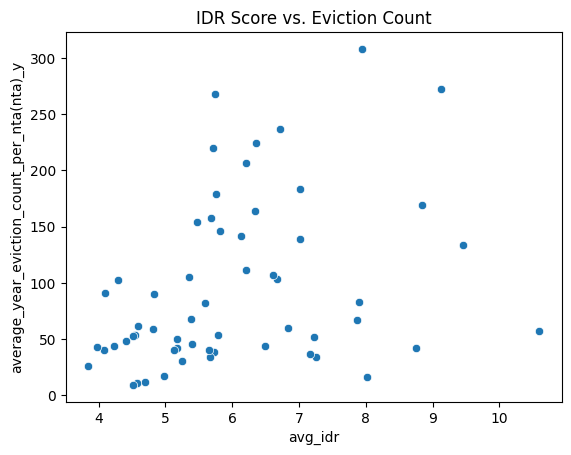

In [916]:
import seaborn as sns
sns.scatterplot(data=idr_evi, x='avg_idr', y='average_year_eviction_count_per_nta(nta)_y')
plt.title("IDR Score vs. Eviction Count")
plt.show()

In [917]:
evictions_top_nta = racial_avg_all.Location.to_list()[:15]
evictions_bottom_nta = racial_avg_all.Location.to_list()[-15:]

In [918]:
data = {
    'evictions_top_nta': evictions_top_nta,
    'merged_df_top15_nta': merged_df_top15_nta,
    'merged_df_top_change_15_nta': merged_df_top_change_15_nta,
    'evictions_bottom_nta': evictions_bottom_nta,
    'merged_df_bottom15_nta': merged_df_bottom15_nta,
    'merged_df_bottom_change_15_nta': merged_df_bottom_change_15_nta
}

data_df = pd.DataFrame(data)
data_df

,evictions_top_nta,merged_df_top15_nta,merged_df_top_change_15_nta,evictions_bottom_nta,merged_df_bottom15_nta,merged_df_bottom_change_15_nta
0,Crown Heights North,Lower East Side,East Flatbush,Throgs Neck,Canarsie,Borough Park
1,Central Harlem,East Harlem,Elmhurst/Corona,Fresh Meadows/Briarwood,Jamaica/St. Albans,Tottenville
2,Williamsbridge,Central Harlem,East Harlem,Bensonhurst,Tottenville,Flatbush/Midwood
3,University Heights,Brownsville,Crown Heights South,Greenwich Village,Sunnyside/Woodside,Mott Haven
4,Concourse/Highbridge,Manhattanville,Sheepshead Bay,Sunset Park,South Beach,East New York
5,East Tremont,Williamsburg/Greenpoint,Concourse/Highbridge,Midtown Business District,Woodhaven,Throgs Neck
6,Bedford Park,Crown Heights North,University Heights,Fort Greene/Brooklyn Hts,Bayside,St. George
7,East New York,Chelsea/Clinton,Unionport/Soundview,Borough Park,Upper East Side,Chelsea/Clinton
8,Flatbush/Midwood,Coney Island,Murray Hill/Stuyvesant,Murray Hill/Stuyvesant,Howard Beach,Hunts Point
9,Brownsville,Fort Greene/Brooklyn Hts,Washington Heights,Battery Park/Tribeca,Jackson Heights,East Tremont


In [919]:
evi_top_nta = set(data_df['evictions_top_nta'].to_list())
merged_df_top = set(data_df['merged_df_top15_nta'].to_list())
merged_df_top_change = set(data_df['merged_df_top_change_15_nta'].to_list())
merged_top_nta = set(data_df['merged_df_top15_nta'].to_list())
merged_top_change_nta = set(data_df['merged_df_top_change_15_nta'].to_list())
merged_bottom_nta = set(data_df['merged_df_bottom15_nta'].to_list())
merged_bottom_change_nta = set(data_df['merged_df_bottom_change_15_nta'].to_list())
evi_bottom_nta = set(data_df['evictions_bottom_nta'].to_list())
merged_df_bottom = set(data_df['merged_df_bottom15_nta'].to_list())
merged_df_bottom_change = set(data_df['merged_df_bottom_change_15_nta'].to_list())
matched_eviction_df1 = evi_top_nta.intersection(merged_top_nta)
matched_eviction_df2 = evi_top_nta.intersection(merged_top_change_nta)
matched_eviction_df3 = merged_df_top.intersection(merged_df_top_change)
matched_eviction_df4 = evi_bottom_nta.intersection(merged_bottom_nta)
matched_eviction_df5 = evi_bottom_nta.intersection(merged_bottom_change_nta)
matched_eviction_df6 = merged_df_bottom.intersection(merged_df_bottom_change)
matched_eviction_df1, matched_eviction_df2, matched_eviction_df3, matched_eviction_df4, matched_eviction_df5, matched_eviction_df6

({'Brownsville', 'Central Harlem', 'Crown Heights North', 'East New York'},
 {'Concourse/Highbridge',
  'Crown Heights South',
  'East Flatbush',
  'University Heights',
  'Washington Heights',
  'Williamsbridge'},
 {'East Harlem', 'Lower East Side', 'Manhattanville'},
 {'Battery Park/Tribeca',
  'Bayside',
  'Greenwich Village',
  'South Beach',
  'Tottenville'},
 {'Battery Park/Tribeca',
  'Borough Park',
  'Greenwich Village',
  'Midtown Business District',
  'Throgs Neck',
  'Tottenville'},
 {'Battery Park/Tribeca', 'Greenwich Village', 'Tottenville'})

In [920]:
idr_evi.rename(columns={'average_year_eviction_count_per_nta(nta)_y': 'eviction_count'}, inplace=True)

In [921]:
import statsmodels.api as sm

In [922]:
idr_evi.rename(columns={'average_year_eviction_count_per_nta(nta)_y': 'eviction_count'}, inplace=True)

In [923]:
idr_evi

,Location,avg_idr,avg_change,eviction_count,ep_afam,ep_asian,ep_hisp,ep_nhpi,ep_white,ep_twomore,ep_otherrace,rpl_themes,avg_change_abs,median_income
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.25841313,24.79630643,22.40054720,0.02147743,41.26388509,3.46005472,0.73830369,0.86751806,7.27757147,50348.33751000
1,East Harlem,9.44691500,10.46182847,133.62208301,32.34917776,7.68285043,41.94369616,0.00000000,14.31527016,2.55160532,1.09256069,0.97807283,10.46182847,43214.26394500
2,Central Harlem,9.12608250,-0.41601528,272.54174397,50.90723562,4.55092764,26.56739332,0.00009276,13.71182746,3.29053803,0.89675325,0.95695213,0.41601528,54589.71946000
3,Brownsville,8.83346500,-17.20713263,169.40316880,68.28379037,1.19226082,17.88738574,0.00030469,7.22985984,4.65941499,0.45423522,0.97347709,17.20713263,40754.19235000
4,Manhattanville,8.75022000,6.19990767,42.20000000,28.90189573,6.58199052,37.32037915,0.00000000,22.26682464,3.81753555,0.90710900,0.93138720,6.19990767,61835.35973000
5,Williamsburg/Greenpoint,8.01481750,2.17201478,16.41066667,4.19600000,5.19733333,17.46933333,0.00000000,66.76933333,5.70800000,0.51600000,0.71599333,2.17201478,65234.52334500
6,Crown Heights North,7.94046750,-3.80151459,307.98520746,53.35267589,2.61178593,14.49314492,0.00036079,24.12886350,4.31124474,0.94810583,0.92130764,3.80151459,64041.59018000
7,Chelsea/Clinton,7.89845000,-9.92344986,82.50553506,5.74575646,16.97896679,17.39421894,0.09348093,54.94292743,4.29335793,0.49102091,0.74494539,9.92344986,155916.01097500
8,Coney Island,7.86151500,-0.79680862,66.77763371,13.81766613,11.62042139,15.74700162,0.00000000,54.67406807,3.72512156,0.18978930,0.97732237,0.79680862,56048.26458000
9,Fort Greene/Brooklyn Hts,7.24907750,2.07995590,34.05645390,18.06921986,8.48226950,13.71475177,0.19914894,53.00624113,5.67517730,0.72624113,0.77357376,2.07995590,122877.02675500


In [924]:
idr_evi['avg_idr_squared'] = idr_evi['avg_idr']**2
model = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_idr_squared + rpl_themes + ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.702
Model:                                    OLS   Adj. R-squared:                  0.673
Method:                         Least Squares   F-statistic:                     24.44
Date:                        Tue, 06 May 2025   Prob (F-statistic):           1.43e-12
Time:                                02:24:07   Log-Likelihood:                -35.305
No. Observations:                          58   AIC:                             82.61
Df Residuals:                              52   BIC:                             94.97
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [925]:
model_linear = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model_linear.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.693
Model:                                    OLS   Adj. R-squared:                  0.676
Method:                         Least Squares   F-statistic:                     40.59
Date:                        Tue, 06 May 2025   Prob (F-statistic):           7.23e-14
Time:                                02:24:07   Log-Likelihood:                -36.143
No. Observations:                          58   AIC:                             80.29
Df Residuals:                              54   BIC:                             88.53
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [926]:
idr_evi['avg_idr_squared'] = idr_evi['avg_idr']**2
model = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_idr_squared + rpl_themes +  ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.702
Model:                                    OLS   Adj. R-squared:                  0.673
Method:                         Least Squares   F-statistic:                     24.44
Date:                        Tue, 06 May 2025   Prob (F-statistic):           1.43e-12
Time:                                02:24:07   Log-Likelihood:                -35.305
No. Observations:                          58   AIC:                             82.61
Df Residuals:                              52   BIC:                             94.97
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [927]:
idr_evi['log_avg_idr'] = np.log(idr_evi['avg_idr'] + 1)

In [928]:
model_enhanced = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_idr_squared + ep_afam + ep_hisp + rpl_themes",
    data=idr_evi
).fit()
print(model_linear.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.693
Model:                                    OLS   Adj. R-squared:                  0.676
Method:                         Least Squares   F-statistic:                     40.59
Date:                        Tue, 06 May 2025   Prob (F-statistic):           7.23e-14
Time:                                02:24:07   Log-Likelihood:                -36.143
No. Observations:                          58   AIC:                             80.29
Df Residuals:                              54   BIC:                             88.53
Df Model:                                   3                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [929]:
eviction_df_agg.rename(columns={'Locations': 'Location'}, inplace=True)
# idr_evi

In [930]:
eviction_df_agg.rename(columns = {'neighborhood': 'Location'}, inplace= True)

In [931]:
idr_evi = idr_evi.merge(
    eviction_df_agg,
    on='Location',
    how='left'
)

In [932]:
idr_evi

,Location,avg_idr,avg_change,eviction_count,ep_afam_x,ep_asian_x,ep_hisp_x,ep_nhpi_x,ep_white_x,ep_twomore_x,ep_otherrace_x,rpl_themes_x,avg_change_abs,median_income,avg_idr_squared,log_avg_idr,primary_key,bbl,court_index_number,docket_number,eviction_address,eviction_apartment_number,executed_date,borough,zipcode,ejectment,eviction/legal_possession,latitude,longitude,community_board,council_district,census_tract,bin,nta,year,month_year,geometry,yearbuilt,bldgclass,numfloors,unitsres,ownername,bldgarea,building_type,building_category,is_condo,floor_category,rent_era,architectural_style,economic_period,residential_units_category,is_llc,building_size_category,size_quartile,decade,fips,e_totpop,rpl_theme1,rpl_theme2,rpl_theme3,rpl_theme4,rpl_themes_y,ep_pov150,ep_unemp,ep_nohsdp,ep_uninsur,ep_age65,ep_age17,ep_disabl,ep_limeng,ep_noveh,ep_crowd,ep_hburd,ep_afam_y,ep_hisp_y,ep_asian_y,ep_aian,ep_nhpi_y,ep_twomore_y,ep_otherrace_y,ep_minrty,ep_white_y,invalid_zip,svi_quartile,svi_group,air_quality,animal_issues,appliances,building_exterior,doors_windows,electrical_issues,elevator_issues,floors_stairs,general_complaints,graffiti_posting,heat_hot_water,homeless_issues,noise_complaints,other_issues,pest_issues,plumbing_issues,police_matters,public_nuisance,safety_concerns,sanitation_issues,walls_ceilings,total_complaints,average_year_eviction_count_per_unit(building),average_year_eviction_count(building),average_year_eviction_count_per_nta(nta)_x,average_5year_eviction_count_per_unit(building),bh_pct,unit_count_zipcode,building_count_zipcode,average_year_eviction_count_per_zipcode(z),average_year_eviction_per_10building_zipcode(z),evictions_per_zipcode_1kpop(z),evictions_per_1kunit_zipcode_1kpop(z),children_impacted_zipcode_per_1kpop(z),poverty_impacted_zipcode_per_1kpop(z),disability_impacted_zipcode_per_1kpop(z),unemployed_impacted_zipcode_per_1kpop(z),elderly_impacted_zipcode_per_1kpop(z),bh_impacted_zipcode_per_1kpop(z),hburd_impacted_zipcode_per_1kpop(z),crowd_impacted_zipcode_per_1kpop(z),limeng_impacted_zipcode_per_1kpop(z),uninsur_impacted_zipcode_per_1kpop(z),children_impacted_zipcode,people_impacted_zipcode,poverty_impacted_zipcode,disability_impacted_zipcode,unemployed_impacted_zipcode,elderly_impacted_zipcode,hburd_impacted_zipcode,bh_impacted_zipcode,crowd_impacted_zipcode,limeng_impacted_zipcode,uninsur_impacted_zipcode,average_year_eviction_count_per_nta(nta)_y
0,Lower East Side,10.59498500,7.27757147,56.72749658,7.25841313,24.79630643,22.40054720,0.02147743,41.26388509,3.46005472,0.73830369,0.86751806,7.27757147,50348.33751000,112.25370715,2.45057268,014679/18_115084,1002600001,014679/18,115084,630 WATER STREET,05E,2019-03-15,MANHATTAN,10002,Not an Ejectment,Eviction,40.71138100,-73.98286600,3.00000000,2.00000000,202.00000000,1077523,Lower East Side,2019,2019-03,POINT (-73.982866 40.711381),1940.00000000,D9,6.00000000,813.00000000,NYC HOUSING AUTHORITY,513000.00000000,pre-war,elevator,False,mid-rise,"Pre-1947, pre-rent-control","1931–1950, Manhattan Modern","1930-1945, great depression and WWII",100+ units,False,mega,Q4 (largest 25%),1940-1949,10002,76518.00000000,0.96390000,0.87810000,0.93690000,0.92540000,0.96560000,36.80000000,7.60000000,30.00000000,5.40000000,23.10000000,13.10000000,13.00000000,24.70000000,82.80000000,6.80000000,40.80000000,8.00000000,26.00000000,37.20000000,0.10000000,0.00000000,2.40000000,0.80000000,74.40000000,25.60000000,False,Q3,medium-high,6.00000000,2.00000000,0.00000000,0.00000000,3.00000000,0.00000000,4.00000000,0.00000000,0.00000000,0.00000000,0.00000000,3.00000000,942.00000000,4.00000000,10.00000000,10.00000000,9.00000000,4.00000000,0.00000000,1.00000000,0.00000000,998.00000000,0.00073801,0.60000000,76.60000000,0.00369004,34.00000000,31865.00000000,996.00000000,61.00000000,0.61244980,0.79719804,0.00000964,0.10443294,0.29336888,0.10363575,0.06058705,0.18415275,0.27104734,0.32525680,0.05420947,0.19690792,0.04304869,20.05741000,153.11000000,56.34448000,19.90430000,11.63636000,35.36841000,62

In [933]:
columns_to_drop = ['average_year_eviction_count_per_nta(nta)_x', 'average_year_eviction_count_per_nta(nta)_y', 'average_year_eviction_count_per_nta(nta)_y', 'ep_afam_x',
                   'ep_asian_x', 'ep_hisp_x',	'ep_nhpi_x', 'ep_white_x', 'ep_twomore_x', 'ep_otherrace_x', 'rpl_themes_x']
idr_evi.drop(columns=columns_to_drop, inplace=True)

In [934]:
idr_evi.rename(columns={'ep_afam_y': 'ep_afam', 'ep_asian_y': 'ep_asian', 'ep_hisp_y': 'ep_hisp', 'ep_nhpi_y': 'ep_nhpi',
                        'ep_white_y': 'ep_white', 'ep_twomore_y': 'ep_twomore', 'ep_otherrace_y': 'ep_otherrace', 'rpl_themes_y': 'rpl_themes'}, inplace=True)

In [935]:
model = sm.OLS.from_formula(
    'eviction_count ~ avg_idr + ep_pov150',
    data=idr_evi
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         eviction_count   R-squared:                       0.344
Model:                            OLS   Adj. R-squared:                  0.344
Method:                 Least Squares   F-statistic:                 1.739e+04
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        02:24:08   Log-Likelihood:            -3.6751e+05
No. Observations:               66395   AIC:                         7.350e+05
Df Residuals:                   66392   BIC:                         7.350e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -43.8676      1.232    -35.595      0.0

In [936]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = idr_evi[['avg_idr', 'avg_change_abs', 'rpl_themes', 'ep_pov150',  'ep_afam', 'ep_hisp']]
vifs = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(pd.DataFrame({'Variable': X.columns, 'VIF': vifs}))

         Variable         VIF
0         avg_idr 26.47647613
1  avg_change_abs  3.21997223
2      rpl_themes 39.14681975
3       ep_pov150 23.17142242
4         ep_afam  3.95079150
5         ep_hisp 11.00433421


In [937]:
idr_evi[['ep_hisp', 'avg_idr', 'ep_afam']].corr()

,ep_hisp,avg_idr,ep_afam
ep_hisp,1.00000000,-0.07150721,-0.30311935
avg_idr,-0.07150721,1.00000000,0.22197948
ep_afam,-0.30311935,0.22197948,1.00000000


In [938]:
from sklearn.decomposition import PCA
idr_evi['svi_pca'] = PCA(n_components=1).fit_transform(idr_evi[['rpl_theme1', 'rpl_theme4']])

In [939]:
idr_evi_std = idr_evi.copy()
for col in ['avg_idr', 'ep_afam', 'ep_hisp', 'unitsres']:
    idr_evi_std[col] = (idr_evi[col] - idr_evi[col].mean()) / idr_evi[col].std()

model_std = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + ep_afam + ep_hisp + ep_hburd",
    data=idr_evi_std
).fit()
print(model_std.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.616
Model:                                    OLS   Adj. R-squared:                  0.616
Method:                         Least Squares   F-statistic:                 2.666e+04
Date:                        Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                02:24:09   Log-Likelihood:                -35583.
No. Observations:                       66395   AIC:                         7.118e+04
Df Residuals:                           66390   BIC:                         7.122e+04
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------

In [940]:
model_clean = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + ep_afam + ep_hisp + ep_hburd + ep_crowd + ep_age17 + ep_uninsur + \
    ep_limeng + rpl_theme4 + rpl_theme1 + unitsres + building_category + decade + is_llc + building_size_category + bldgclass + numfloors",
    data=idr_evi
).fit()
print(model_clean.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.691
Model:                                    OLS   Adj. R-squared:                  0.691
Method:                         Least Squares   F-statistic:                     1880.
Date:                        Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                02:24:12   Log-Likelihood:                -28358.
No. Observations:                       66395   AIC:                         5.688e+04
Df Residuals:                           66315   BIC:                         5.760e+04
Df Model:                                  79                                         
Covariance Type:                    nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
------------

In [941]:
groups = {
    "Racial": ['ep_afam', 'ep_hisp', 'ep_asian', 'ep_aian', 'ep_nhpi',
       'ep_twomore', 'ep_otherrace', 'ep_minrty', 'ep_white',],


    "Economic": ["avg_idr", "avg_change_abs", "avg_idr_squared", 'median_income', "ep_pov150", "ep_unemp", "ep_hburd", 'ep_uninsur'],


    "Socioeconomic": ['ep_nohsdp', 'ep_age65','ep_age17', 'ep_disabl', 'ep_limeng', 'ep_noveh', 'ep_crowd'],


    "SVI": ["rpl_theme1", "rpl_theme2", "rpl_theme3", "rpl_theme4"],


    "Building": ['yearbuilt', 'numfloors', 'unitsres', 'bldgarea', 'building_type','is_condo'],


    "Complaints": ['air_quality', 'animal_issues',
       'appliances', 'building_exterior', 'doors_windows', 'electrical_issues',
       'elevator_issues', 'floors_stairs', 'general_complaints',
       'graffiti_posting', 'heat_hot_water', 'homeless_issues',
       'noise_complaints', 'other_issues', 'pest_issues', 'plumbing_issues',
       'police_matters', 'public_nuisance', 'safety_concerns',
       'sanitation_issues', 'walls_ceilings', 'total_complaints']
}

In [942]:
# idr_evi_std['decade'].head()

In [943]:
# idr_evi_std['decade'].isnull().sum()
# # idr_evi_std = idr_evi_std.dropna(subset=['decade'])
# print(idr_evi_std['decade'].dtype)
# stop
# idr_evi_std['decade'] = pd.to_numeric(idr_evi_std['decade'], errors='coerce')
# idr_evi_std['decade'].dtype, idr_evi_std.isna().sum().sum()

In [944]:
building_type_map = {
    "pre-war": 0,
    'post-war': 1,
}
idr_evi['building_type'] = idr_evi['building_type'].map(building_type_map)

In [945]:
# idr_evi_std['is_llc'].head()
idr_evi['is_llc'] = idr_evi['is_llc'].astype(int)
idr_evi['is_condo'] = idr_evi['is_condo'].astype(int)

In [946]:
# idr_evi.columns.to_list()

In [947]:
idr_evi.columns[-125:-30]

Index(['avg_idr_squared', 'log_avg_idr', 'primary_key', 'bbl',
       'court_index_number', 'docket_number', 'eviction_address',
       'eviction_apartment_number', 'executed_date', 'borough', 'zipcode',
       'ejectment', 'eviction/legal_possession', 'latitude', 'longitude',
       'community_board', 'council_district', 'census_tract', 'bin', 'nta',
       'year', 'month_year', 'geometry', 'yearbuilt', 'bldgclass', 'numfloors',
       'unitsres', 'ownername', 'bldgarea', 'building_type',
       'building_category', 'is_condo', 'floor_category', 'rent_era',
       'architectural_style', 'economic_period', 'residential_units_category',
       'is_llc', 'building_size_category', 'size_quartile', 'decade', 'fips',
       'e_totpop', 'rpl_theme1', 'rpl_theme2', 'rpl_theme3', 'rpl_theme4',
       'rpl_themes', 'ep_pov150', 'ep_unemp', 'ep_nohsdp', 'ep_uninsur',
       'ep_age65', 'ep_age17', 'ep_disabl', 'ep_limeng', 'ep_noveh',
       'ep_crowd', 'ep_hburd', 'ep_afam', 'ep_hisp', 'ep_asia

In [948]:
results = {}
for name, vars in groups.items():
    formula = f"np.log(eviction_count + 1) ~ {' + '.join(vars)}"
    model = sm.OLS.from_formula(formula, data=idr_evi).fit()
    results[name] = {
        "R-squared": model.rsquared,
        "Adj. R-squared": model.rsquared_adj,
        "Sig. Vars": [var for var in vars if model.pvalues[var] < 0.05]
    }

results_df = pd.DataFrame(results).T
results_df.sort_values("R-squared", ascending=False)

,R-squared,Adj. R-squared,Sig. Vars
Racial,0.56346563,0.56341302,"[ep_aian, ep_nhpi, ep_twomore, ep_white]"
Economic,0.53355127,0.53349506,"[avg_idr, avg_change_abs, avg_idr_squared, median_income, ep_pov150, ep_unemp, ep_hburd, ep_uninsur]"
Socioeconomic,0.49629752,0.49624441,"[ep_nohsdp, ep_age17, ep_disabl, ep_limeng, ep_noveh, ep_crowd]"
SVI,0.41262387,0.41258848,"[rpl_theme2, rpl_theme3, rpl_theme4]"
Building,0.05298030,0.05289471,"[yearbuilt, numfloors, unitsres, building_type, is_condo]"
Complaints,0.04983855,0.04953793,"[air_quality, appliances, building_exterior, doors_windows, electrical_issues, elevator_issues, floors_stairs, general_complaints, graffiti_posting, heat_hot_water, homeless_issues, noise_complaints, other_issues, pest_issues, plumbing_issues, police_matters, safety_concerns, sanitation_issues, walls_ceilings, total_complaints]"


In [949]:
base_r2 = sm.OLS.from_formula("np.log(eviction_count + 1) ~ 1", data=idr_evi).fit().rsquared
incremental = {}
current_vars = []
for name, vars in groups.items():
    current_vars += vars
    formula = f"np.log(eviction_count + 1) ~ {' + '.join(current_vars)}"
    model = sm.OLS.from_formula(formula, data=idr_evi).fit()
    incremental[name] = model.rsquared - base_r2
    base_r2 = model.rsquared

print(pd.Series(incremental).sort_values(ascending=False))

Racial          0.56346563
Economic        0.09749944
Socioeconomic   0.09387162
Building        0.00331130
SVI             0.00314044
Complaints      0.00241754
dtype: float64


In [964]:
final_model = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr_squared + avg_change + ep_afam + median_income + ep_hisp + ep_hburd + is_llc + ep_pov150",
    data=idr_evi
).fit()
print(final_model.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.618
Model:                                    OLS   Adj. R-squared:                  0.618
Method:                         Least Squares   F-statistic:                 1.341e+04
Date:                        Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                02:25:39   Log-Likelihood:                -35453.
No. Observations:                       66395   AIC:                         7.092e+04
Df Residuals:                           66386   BIC:                         7.101e+04
Df Model:                                   8                                         
Covariance Type:                    nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------

In [951]:
idr_evi['hisp_poverty_index'] = (idr_evi['ep_hisp'] + idr_evi['ep_pov150']) / 2

In [952]:
model_refined = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_change_abs + rpl_themes + ep_afam + hisp_poverty_index",
    data=idr_evi
).fit()
print(model_refined.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.606
Model:                                    OLS   Adj. R-squared:                  0.606
Method:                         Least Squares   F-statistic:                 2.043e+04
Date:                        Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                02:24:15   Log-Likelihood:                -36451.
No. Observations:                       66395   AIC:                         7.291e+04
Df Residuals:                           66389   BIC:                         7.297e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [953]:
model_refined = sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr + avg_change_abs + rpl_themes  + ep_afam + ep_hisp",
    data=idr_evi
).fit()
print(model_refined.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.605
Model:                                    OLS   Adj. R-squared:                  0.605
Method:                         Least Squares   F-statistic:                 2.037e+04
Date:                        Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                02:24:15   Log-Likelihood:                -36515.
No. Observations:                       66395   AIC:                         7.304e+04
Df Residuals:                           66389   BIC:                         7.310e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [954]:
sm.OLS.from_formula(
    "np.log(eviction_count + 1) ~ avg_idr * ep_afam + avg_idr * ep_hisp",
    data=idr_evi
).fit()
print(model_refined.summary())

                                OLS Regression Results                                
Dep. Variable:     np.log(eviction_count + 1)   R-squared:                       0.605
Model:                                    OLS   Adj. R-squared:                  0.605
Method:                         Least Squares   F-statistic:                 2.037e+04
Date:                        Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                                02:24:15   Log-Likelihood:                -36515.
No. Observations:                       66395   AIC:                         7.304e+04
Df Residuals:                           66389   BIC:                         7.310e+04
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------

In [955]:
# sm.OLS.from_formula(
#     "np.log(eviction_count + 1) ~ avg_idr * ep_afam_x + avg_idr * ep_hisp_x",
#     data=idr_evi
# ).fit()
# print(model_refined.summary())

In [956]:
import statsmodels.api as sm
idr_evi['avg_idr_squared'] = idr_evi['avg_idr']**2
model = sm.OLS.from_formula(
    "eviction_count ~ avg_idr_squared",
    data=idr_evi
).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         eviction_count   R-squared:                       0.104
Model:                            OLS   Adj. R-squared:                  0.104
Method:                 Least Squares   F-statistic:                     7718.
Date:                Tue, 06 May 2025   Prob (F-statistic):               0.00
Time:                        02:24:15   Log-Likelihood:            -3.7784e+05
No. Observations:               66395   AIC:                         7.557e+05
Df Residuals:                   66393   BIC:                         7.557e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          82.7889      0.705    1

# **Put everything in a dataframe**

In [957]:
data = {
    'Borough': ['Manhattan', 'Brooklyn', 'Queens', 'Bronx', 'Staten Island'],
    'Population': [manhattan_pop, brooklyn_pop, queens_pop, bronx_pop, staten_island_pop],
    'Area': [man_area, bk_area, queens_area, bx_area, si_area],
    'Train Stations': [manhattan_metro_stop_count, brookly_metro_stop_count, queens_metro_stop_count, bronx_metro_stop_count, staten_island_metro_stop_count],
    'Bus Stops': [man_bus_stop.shape[0], bk_bus_stop.shape[0], queens_bus_stop.shape[0], bx_bus_stop.shape[0], si_bus_stop.shape[0]],
    'Stops Ratio': [man_stops_ratio, bk_stops_ratio, queens_stops_ratio, bronx_stops_ratio, si_stops_ratio],
    'Bus Stops Ratio': [man_bus_stop_ratio, bk_bus_stop_ratio, queens_bus_stop_ratio, bx_bus_stop_ratio, si_bus_stop_ratio],
    'SVI': [man_svi, bk_svi, queens_svi, bx_svi, si_svi],
    'Housing and Transportation SVI': [man_ht_svi, bk_ht_svi, queens_ht_svi, bx_ht_svi, si_ht_svi]
}
data_df = pd.DataFrame(data)
data_df

,Borough,Population,Area,Train Stations,Bus Stops,Stops Ratio,Bus Stops Ratio,SVI,Housing and Transportation SVI
0,Manhattan,1645867,22.65796344,153,720,0.09296012,0.43745941,0.85250000,0.98360000
1,Brooklyn,2679620,69.37653864,169,871,0.06306864,0.32504609,0.96720000,0.80330000
2,Queens,2360826,108.72402512,83,968,0.03515719,0.41002598,0.88520000,0.72130000
3,Bronx,1443229,42.17611220,70,563,0.04850235,0.39009748,1.00000000,0.95080000
4,Staten Island,492925,57.52251071,21,208,0.04260283,0.42197089,0.70490000,0.68850000


In [958]:
link_school = '/content/drive/My Drive/X999/school_locations.csv'
school_df = pd.read_csv(link_school)

In [959]:
school_df.head()

,fiscal_year,system_code,location_code,location_name,BEDS,Managed_by_name,location_type_description,Location_Category_Description,Grades_text,Grades_final_text,open_date,Status_descriptions,Primary_building_code,primary_address_line_1,State_code,X_COORDINATE,Y_COORDINATE,LONGITUDE,LATITUDE,Community_district,Council-district,Census_tract,Borough_block_lot,NTA,NTA_Name,Principal_Name,Principal_title,Principal_phone_number,fax_number,Geographical_District_code,Administrative_District_Code,Administrative_District_Name,community_school_sup_name,Tier_3_Support_Location_Name,Tier_3_Support_Leader_Name,Tier_2_Support_Location_Name,HighSchool_Network_Location_Code,HighSchool_Network_Name,HighSchool_Network_Superintendent,Community_district 1,Police_precinct
0,2020,15K001,K001,P.S. 001 The Bergen,331500010001,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",1965-07-01T00:00:00.000,Open,K001,309 47 STREET,NY,981081.00000000,175710.00000000,-74.01142000,40.64895900,307.00000000,38.00000000,8000.00000000,3007550022.00000000,BK32,Sunset Park West,Arlene Ramos,Principal,718-567-7661,718-567-9771,15,15,COMMUNITY SCHOOL DISTRICT 15,"SKOP, ANITA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 5- Brooklyn North,NaN,NaN,NaN,307.00000000,72.00000000
1,2020,17K002,K002,Parkside Preparatory Academy,331700010002,DOE,General Academic,Junior High-Intermediate-Middle,"06,07,08,SE","06,07,08",1994-07-01T00:00:00.000,Open,K002,655 PARKSIDE AVENUE,NY,997686.00000000,178433.00000000,-73.95157500,40.65642300,309.00000000,40.00000000,80200.00000000,3050500051.00000000,BK60,Prospect Lefferts Gardens-Wingate,ADRIENNE SPENCER,Principal,718-462-6992,718-284-7717,17,17,COMMUNITY SCHOOL DISTRICT 17,"ELLIS, CLARENCE",NYCDOE Borough Office - Brooklyn South,Mauriciere de Govia,School Support Team 2- Brooklyn South,NaN,NaN,NaN,309.00000000,71.00000000
2,2020,13K003,K003,P.S. 003 The Bedford Village,331300010003,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",1950-07-01T00:00:00.000,Open,K003,50 JEFFERSON AVENUE,NY,996670.00000000,187864.00000000,-73.95521900,40.68231100,303.00000000,36.00000000,22700.00000000,3019980001.00000000,BK69,Clinton Hill,KRISTINA BEECHER,Principal,718-622-2960,718-623-3193,13,13,COMMUNITY SCHOOL DISTRICT 13,"SAMUELS, KAMAR",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 3- Brooklyn North,NaN,NaN,NaN,303.00000000,79.00000000
3,2020,75K004,K004,P.S. K004,307500013004,DOE,Special Education,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05,06,07,SE",1999-07-01T00:00:00.000,Open,K273,923 JEROME STREET,NY,1017745.00000000,179209.00000000,-73.87927600,40.65850000,305.00000000,42.00000000,107800.00000000,3044010001.00000000,BK82,East New York,Rebecca Schropfer,Principal,929-275-3937,718-927-3554,19,75,CITYWIDE SPECIAL EDUCATION,"LOUISSAINT, KETLER",D75 CITYWIDE BCO,Tillman Roberto,Children First Network 752,NaN,NaN,NaN,305.00000000,75.00000000
4,2020,16K005,K005,P.S. 005 Dr. Ronald McNair,331600010005,DOE,General Academic,Elementary,"PK,0K,01,02,03,04,05,SE","PK,0K,01,02,03,04,05",1966-07-01T00:00:00.000,Open,K005,820 HANCOCK STREET,NY,1005891.00000000,188938.00000000,-73.92197000,40.68524100,303.00000000,41.00000000,37700.00000000,3014900001.00000000,BK35,Stuyvesant Heights,LENA GATES,Principal,718-218-2444,718-218-2445,16,16,COMMUNITY SCHOOL DISTRICT 16,"MARTIN, YOLANDA",NYCDOE Borough Office - Brooklyn North,NaN,School Support Team 4- Brooklyn North,NaN,NaN,NaN,303.00000000,81.00000000


In [960]:
school_df.Location_Category_Description.unique()

array(['Elementary', 'Junior High-Intermediate-Middle', 'K-8',
       'K-12 all grades', 'Secondary School', 'High school',
       'Early Childhood', 'Ungraded', 'Collaborative or Multi-graded'],
      dtype=object)